<a id = '0.0'></a>


# <p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color :#4682B4; border-radius: 5px 5px;"><strong>PREDICT FUTURE SALES</strong></p>

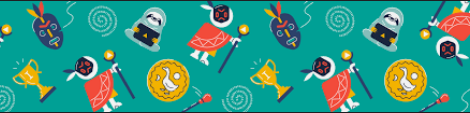

<a id = '0.0'></a>
# <p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 

* [Introduction](#1.0)
* [Importing libraries](#2.0)
* [Importing Dataset & Data Overview](#3.0)
* [Understanding the Dataset & Data Cleaning](#4.0)
    * [Train Set Distribution](#5.0)
    * [Checking](#6.0)
    * [Delete Data Duplicated](#7.0)
    * [Check Qutliers](#8.0)
    * [Checking Train & Test Set ](#9.0) 
* [Seasonality](#10.0)
* [Exploratory Data Analysis (EDA)](#11.0)
    * [Russian Holidays & Observances](#12.0) 

<a id = '1.0'></a>
# <p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Introduction</strong></p>

### **Data Description**

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

### **File Descriptions**


*   sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
*   test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
*   sample_submission.csv - a sample submission file in the correct format.
*   items.csv - supplemental information about the items/products.
*   item_categories.csv  - supplemental information about the items categories.
*   shops.csv- supplemental information about the shops.

### **Data Fiels**

* ID - an Id that represents a (Shop, Item) tuple within the test set
* shop_id - unique identifier of a shop
* item_id - unique identifier of a product
* item_category_id - unique identifier of item category
* item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
* item_price - current price of an item
* date - date in format dd/mm/yyyy
* date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
* item_name - name of item
* shop_name - name of shop
* item_category_name - name of item category

This dataset is permitted to be used for any purpose, including commercial use.

<a id = '2.0'></a>
# <p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Importing libraries</strong></p>

In [1]:
#!pip install -U strsimpy
#!pip install matplotlib-venn
#!pip install python-Levenshtein
#!pip install googletrans
#!pip install translate
#!pip install googletrans==3.1.0a0
#!pip install termcolor

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
from strsimpy.levenshtein import Levenshtein
from Levenshtein import distance
from googletrans import Translator
from translate import Translator
from sklearn import preprocessing
import statsmodels.api as sm
import calendar
from datetime import datetime
import datetime
import time
from itertools import product
from math import ceil
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

<a id = '3.0'></a>
# <p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Importing Dataset & Data Overview</strong></p>

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\10011598\\Downloads'

In [5]:
# Ignore warning message

warnings.filterwarnings(action='ignore')

# See more rows and columns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

# assign data path

#data_path = '/content/predict_future_sales/'


In [6]:
item_categories = pd.read_csv("C:/Users/10011598/Desktop/Predict Future Sales/item_categories.csv")
items = pd.read_csv("C:/Users/10011598/Desktop/Predict Future Sales/items.csv")
train = pd.read_csv("C:/Users/10011598/Desktop/Predict Future Sales/sales_train.csv")
sample_submission = pd.read_csv("C:/Users/10011598/Desktop/Predict Future Sales/sample_submission.csv")
shops = pd.read_csv("C:/Users/10011598/Desktop/Predict Future Sales/shops.csv")
test = pd.read_csv("C:/Users/10011598/Desktop/Predict Future Sales/test.csv")

In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [9]:
item_categories.isnull().values.any()

False

In [10]:
item_categories.shape

(84, 2)

In [11]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [12]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [13]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [14]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [15]:
df = train.copy()
df.head()
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [17]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [19]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [20]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


<a id = '4.0'></a>
# <p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Understanding the Dataset & Data Cleaning</strong></p>

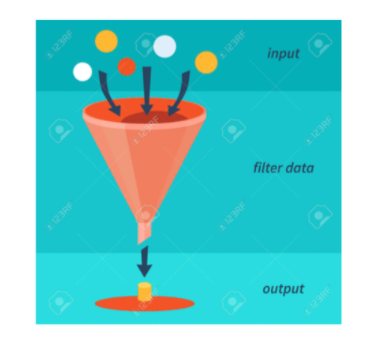

In [21]:
train.date=train.date.apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))

In [22]:
from googletrans import Translator
translator = Translator()

In [23]:
#Translation of Russian to English

from googletrans import Translator
translator = Translator()

shops['city_ru'] = shops['shop_name'].str.split(' ').map(lambda row: row[0])
shops['city_en'] = shops['city_ru'].apply(translator.translate, src='ru', dest='en').apply(getattr, args=('text',))
shops['shop_name_en'] = shops['shop_name'].apply(translator.translate, src='ru', dest='en').apply(getattr, args=('text',))
#shops

In [24]:
items = pd.merge(items, item_categories, on='item_category_id', how='left')
train = pd.merge(train, shops, on='shop_id', how='left')
train = pd.merge(train, items, on='item_id', how='left')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name
0,2013-01-02,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,Yaroslavl,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-03,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",Москва,Moscow,"Moscow SEC ""Atrium""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,2013-01-05,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",Москва,Moscow,"Moscow SEC ""Atrium""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,2013-01-06,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",Москва,Moscow,"Moscow SEC ""Atrium""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",Москва,Moscow,"Moscow SEC ""Atrium""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [25]:
train.sort_values(by="date", ascending=True, inplace=True)
print(f'Minimum data present: {train["date"].min()}')
print(f'Maximum date present: {train["date"].max()}')

Minimum data present: 2013-01-01 00:00:00
Maximum date present: 2015-10-31 00:00:00


In [26]:
# sorting dataframe based on date
train = train.sort_values(by='date').reset_index(drop=True)

In [27]:
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['weekday'] = train['date'].dt.dayofweek
train['day_name'] = train['date'].dt.day_name()

<a id = '5.0'></a>
## <p style = "font-size : 30px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #006400; border-radius: 5px 5px;"><strong>Train Set Distribution</strong></p>

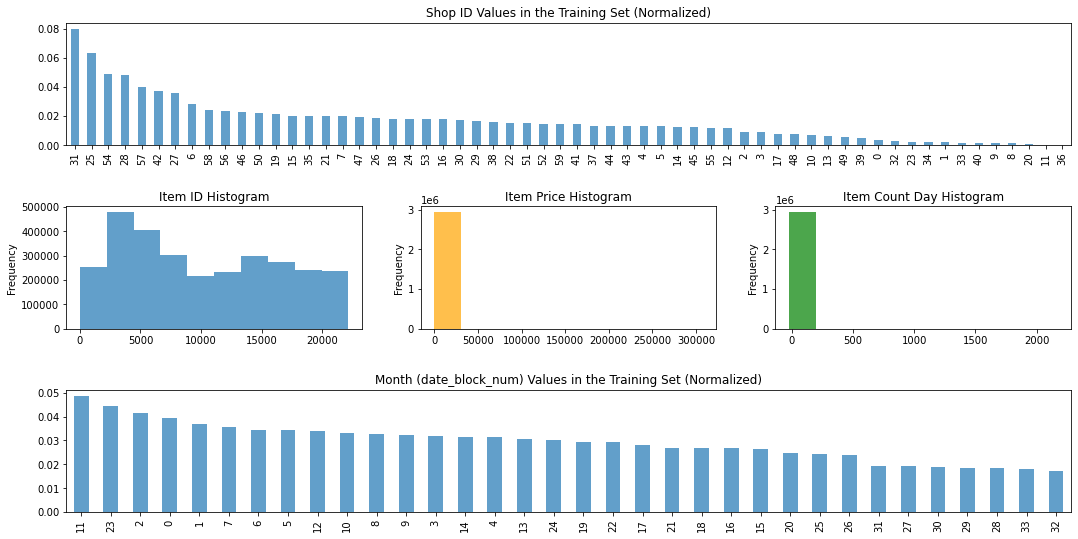

In [28]:
fig = plt.figure(figsize=(18, 9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0, 0), colspan=5)
train['shop_id'].value_counts(normalize=True).plot(kind='bar',
        alpha=0.7)
plt.title('Shop ID Values in the Training Set (Normalized)')

plt.subplot2grid((3, 3), (1, 0))
train['item_id'].plot(kind='hist', alpha=0.7)
plt.title('Item ID Histogram')

plt.subplot2grid((3, 3), (1, 1))
train['item_price'].plot(kind='hist', alpha=0.7, color='orange')
plt.title('Item Price Histogram')

plt.subplot2grid((3, 3), (1, 2))
train['item_cnt_day'].plot(kind='hist', alpha=0.7, color='green')
plt.title('Item Count Day Histogram')

plt.subplot2grid((3, 3), (2, 0), colspan=3)
train['date_block_num'].value_counts(normalize=True).plot(kind='bar',
        alpha=0.7)
plt.title('Month (date_block_num) Values in the Training Set (Normalized)'
          )

plt.show()

According to the graphs above:


*   We have 58 different shops but there is an uneven distribtution of these in the dataset. 
*   Four of these shops make up almost the 30 percent of this dataset whiich have the id's 31, 25, 54, 28 and 57.
*   The item id's seem to have variations in frequency and certain cateogeries are obviously sell better.
*   From the big empty spaces in the histograms of 'item_price' and 'item_cnt_day', we can say that there are outliers in their distribution.
*   Plotting the months from January 2013 to October 2015, it is interesting to see that the block month 11, corresponding to December 2013, had the highest number of sales. Month 23, which corresponds to December 2014, had the second highest number of sales.

<a id = '6.0'></a>
## <p style = "font-size : 30px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #006400; border-radius: 5px 5px;"><strong>Checking</strong></p>


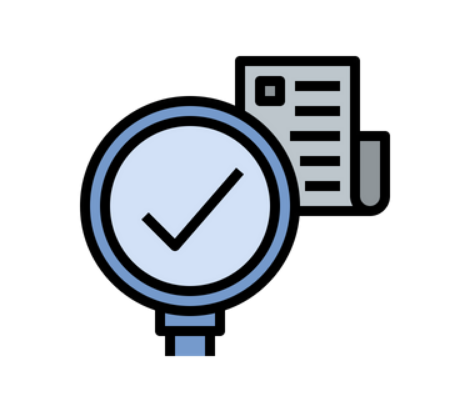

In [29]:
def check_df(dataframe, head=5):
    print('--'*20 + 'Shape' + '--'*20)
    print(dataframe.shape)
    print('--'*20 + 'Types' + '--'*20)
    print(dataframe.dtypes)
    print('--'*20 + 'Head' + '--'*20)
    print(dataframe.head(head))
    print('--'*20 + 'Tail' + '--'*20)
    print(dataframe.tail(head))
    print('--'*20 + 'NA' + '--'*20)
    print(dataframe.isnull().sum())
    print('--'*20 + 'Quantiles' + '--'*20)
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print('--'*20 + 'Describe' + '--'*20)
    print(dataframe.describe().T)

In [30]:
check_df(train)

----------------------------------------Shape----------------------------------------
(2935849, 18)
----------------------------------------Types----------------------------------------
date                  datetime64[ns]
date_block_num                 int64
shop_id                        int64
item_id                        int64
item_price                   float64
item_cnt_day                 float64
shop_name                     object
city_ru                       object
city_en                       object
shop_name_en                  object
item_name                     object
item_category_id               int64
item_category_name            object
day                            int64
month                          int64
year                           int64
weekday                        int64
day_name                      object
dtype: object
----------------------------------------Head----------------------------------------
        date  date_block_num  shop_id  item_id  i

In above, shop and item tables are merged with our train data.

<a id = '7.0'></a>
## <p style = "font-size : 30px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #006400; border-radius: 5px 5px;"><strong>Delete Data Duplicated</strong></p>


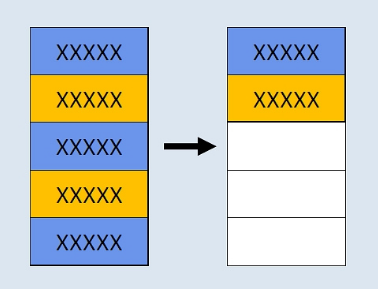

In [31]:
duplicate = train[train.duplicated()]  
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name
21214,2013-01-05,0,54,20130,149.0,1.0,"Химки ТЦ ""Мега""",Химки,Khimki,"Химки ТЦ ""Мега""",УЧЕНИК ЧАРОДЕЯ (регион),40,Кино - DVD,5,1,2013,5,Saturday
1444438,2014-02-23,13,50,3423,999.0,1.0,"Тюмень ТЦ ""Гудвин""",Тюмень,Tyumen,"Тюмень ТЦ ""Гудвин""","Far Cry 3 (Classics) [Xbox 360, русская версия]",23,Игры - XBOX 360,23,2,2014,6,Sunday
1526883,2014-03-23,14,21,3423,999.0,1.0,"Москва МТРЦ ""Афи Молл""",Москва,Moscow,"Moscow MTRC ""Afi Mall""","Far Cry 3 (Classics) [Xbox 360, русская версия]",23,Игры - XBOX 360,23,3,2014,6,Sunday
1627964,2014-05-01,16,50,3423,999.0,1.0,"Тюмень ТЦ ""Гудвин""",Тюмень,Tyumen,"Тюмень ТЦ ""Гудвин""","Far Cry 3 (Classics) [Xbox 360, русская версия]",23,Игры - XBOX 360,1,5,2014,3,Thursday
1818962,2014-07-12,18,25,3423,999.0,1.0,"Москва ТРК ""Атриум""",Москва,Moscow,"Moscow SEC ""Atrium""","Far Cry 3 (Classics) [Xbox 360, русская версия]",23,Игры - XBOX 360,12,7,2014,5,Saturday
2318466,2014-12-31,23,42,21619,499.0,1.0,"СПб ТК ""Невский Центр""",СПб,St. Petersburg,"СПб ТК ""Невский Центр""",ЧЕЛОВЕК ДОЖДЯ (BD),37,Кино - Blu-Ray,31,12,2014,2,Wednesday


We found that our data have 6 duplicated observations and removed them in the code below.

In [32]:
train = train.drop_duplicates()

In [33]:
le = preprocessing.LabelEncoder()

main_categories = train['item_category_name'].str.split('-')
#main_categories

train['main_category_name'] = main_categories.map(lambda row: row[0].strip(','))
train['sub_category_name'] = main_categories.map(lambda row: row[1].strip(',') if len(row) > 1 else row[0].strip(','))

train['main_category_id'] = le.fit_transform(train['main_category_name'])
train['sub_category_id'] = le.fit_transform(train['sub_category_name'])

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id
0,2013-01-01,0,18,5823,2500.0,1.0,"Красноярск ТЦ ""Июнь""",Красноярск,Krasnoyarsk,"Krasnoyarsk shopping center ""June""",Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,1,1,2013,1,Tuesday,Карты оплаты,PSN,9,12
1,2013-01-01,0,54,17111,149.0,1.0,"Химки ТЦ ""Мега""",Химки,Khimki,"Химки ТЦ ""Мега""",ПЛАНЕТА СОКРОВИЩ м/ф (Регион),40,Кино - DVD,1,1,2013,1,Tuesday,Кино,DVD,11,4
2,2013-01-01,0,15,12168,189.0,2.0,"Калуга ТРЦ ""XXI век""",Калуга,Kaluga,"Kaluga SEC ""XXI century""","Игрушка-мялка ""Сердитые птички"" в ассортименте...",70,Подарки - Сувениры (в навеску),1,1,2013,1,Tuesday,Подарки,Сувениры (в навеску),14,53
3,2013-01-01,0,18,3686,899.0,1.0,"Красноярск ТЦ ""Июнь""",Красноярск,Krasnoyarsk,"Krasnoyarsk shopping center ""June""","God of War 3 (Essentials) [PS3, русская версия]",19,Игры - PS3,1,1,2013,1,Tuesday,Игры,PS3,5,10
4,2013-01-01,0,13,13598,9.0,3.0,"Казань ТЦ ""Бехетле""",Казань,Kazan,"Kazan shopping center ""Bakhetle""","Крафт пакет ""Интересные подарки""-оранжевый",71,"Подарки - Сумки, Альбомы, Коврики д/мыши",1,1,2013,1,Tuesday,Подарки,"Сумки, Альбомы, Коврики д/мыши",14,54


We replaced the categorical values of the variables main and sub category names with a numeric values with label encoding.

In [34]:
cities_en_unique = train['city_en'].unique()
cities_en_unique

array(['Krasnoyarsk', 'Khimki', 'Kaluga', 'Kazan', 'Tyumen', 'Moscow',
       'St. Petersburg', 'Novosibirsk', 'Omsk', 'Sergiev', 'Kursk',
       'Voronezh', 'Rostov on Don', 'Adygea', 'Ufa', 'Surgut', 'Kolomna',
       'Zhukovsky', 'Samara', 'Volzhsky', 'N.Novgorod', 'Chekhov',
       'Balashikha', 'Yaroslavl', '!Yakutsk', 'Online store', 'Vologda',
       'Yakutsk', 'Digital', 'visiting', 'Tomsk', 'Mytishchi'],
      dtype=object)

In [35]:
train['city_ru'] = train['shop_name'].str.split(' ').map(lambda row: row[0])
train.loc[train.city_ru == '!Якутск', 'city_ru'] = 'Якутск'

Then, checked the uniqueness of city names.

Duplicate Shops

In [36]:
def similiars(df, name, id):

    shop_name_list = list(df[name].unique())
    shop_id_list = list(df[id].unique())

    Matrix = np.zeros((len(shop_name_list),len(shop_name_list)))

    for i in range(len(shop_name_list)):
        for j in range(len(shop_name_list)):
            Matrix[i,j] = distance(shop_name_list[i],shop_name_list[j]) / min(len(shop_name_list[i]), len(shop_name_list[j]))

    check = []
    ids = []

    for i in range(len(Matrix)):
      for j in range(len(Matrix[i])):
          if 0 < Matrix[i][j] < 0.3:
            
            if (shop_name_list[i], shop_name_list[j]) not in check:
              check.append((shop_name_list[j], shop_name_list[i]))
              ids.append((shop_id_list[j], shop_id_list[i]))

    for k in range(len(check)):
      close_distance= pd.DataFrame(check[k], ids[k])
      
      print(close_distance)

In [37]:
similiars(train, 'shop_name', 'shop_id')

                  0
38   Омск ТЦ "Мега"
54  Химки ТЦ "Мега"
                                   0
23  Москва ТК "Буденовский" (пав.А2)
24  Москва ТК "Буденовский" (пав.К7)
                          0
31  Москва ТЦ "Семеновский"
30   Москва ТЦ "Перловский"
                             0
11  Жуковский ул. Чкалова 39м²
10  Жуковский ул. Чкалова 39м?
                                0
57        Якутск Орджоникидзе, 56
0   !Якутск Орджоникидзе, 56 фран
                                0
58        Якутск ТЦ "Центральный"
1   !Якутск ТЦ "Центральный" фран
                                                  0
40  РостовНаДону ТРК "Мегацентр Горизонт" Островной
39            РостовНаДону ТРК "Мегацентр Горизонт"


In [38]:
train.loc[train['shop_id'] == 57]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id
224333,2013-03-01,2,57,8873,199.0,1.0,"Якутск Орджоникидзе, 56",Якутск,Yakutsk,"Якутск Орджоникидзе, 56",БИ-2 О чём говорят мужчины,55,Музыка - CD локального производства,1,3,2013,4,Friday,Музыка,CD локального производства,13,2
224358,2013-03-01,2,57,6478,199.5,1.0,"Якутск Орджоникидзе, 56",Якутск,Yakutsk,"Якутск Орджоникидзе, 56","Sims 3. Diesel: Каталог [PC, русская версия]",28,Игры PC - Дополнительные издания,1,3,2013,4,Friday,Игры PC,Дополнительные издания,8,31
224359,2013-03-01,2,57,6490,349.5,1.0,"Якутск Орджоникидзе, 56",Якутск,Yakutsk,"Якутск Орджоникидзе, 56","Sims 3. Сверхъестественное (дополнение) [PC, р...",28,Игры PC - Дополнительные издания,1,3,2013,4,Friday,Игры PC,Дополнительные издания,8,31
224367,2013-03-01,2,57,6577,549.0,1.0,"Якутск Орджоникидзе, 56",Якутск,Yakutsk,"Якутск Орджоникидзе, 56",Skylanders. Интерактивная фигурка Dino-rang,25,Игры - Аксессуары для игр,1,3,2013,4,Friday,Игры,Аксессуары для игр,5,18
224380,2013-03-01,2,57,6479,199.5,1.0,"Якутск Орджоникидзе, 56",Якутск,Yakutsk,"Якутск Орджоникидзе, 56",Sims 3. Katy Perry Сладкие радости: Каталог [P...,30,Игры PC - Стандартные издания,1,3,2013,4,Friday,Игры PC,Стандартные издания,8,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935190,2015-10-31,33,57,2865,698.7,1.0,"Якутск Орджоникидзе, 56",Якутск,Yakutsk,"Якутск Орджоникидзе, 56","Disney. Infinity 2.0 (Marvel). Персонаж ""Дракс""",25,Игры - Аксессуары для игр,31,10,2015,5,Saturday,Игры,Аксессуары для игр,5,18
2935193,2015-10-31,33,57,2576,349.0,1.0,"Якутск Орджоникидзе, 56",Якутск,Yakutsk,"Якутск Орджоникидзе, 56",DEL REY LANA Honeymoon,55,Музыка - CD локального производства,31,10,2015,5,Saturday,Музыка,CD локального производства,13,2
2935194,2015-10-31,33,57,2810,1198.0,1.0,"Якутск Орджоникидзе, 56",Якутск,Yakutsk,"Якутск Орджоникидзе, 56","Diablo III [Xbox 360, русская версия]",23,Игры - XBOX 360,31,10,2015,5,Saturday,Игры,XBOX 360,5,16
2935195,2015-10-31,33,57,1010,298.0,1.0,"Якутск Орджоникидзе, 56",Якутск,Yakutsk,"Якутск Орджоникидзе, 56",3D Crystal Puzzle Клубника L Светильник,67,Подарки - Развитие,31,10,2015,5,Saturday,Подарки,Развитие,14,49


In [39]:
train.loc[train['shop_id'] == 0, 'shop_id'] = 57
test.loc[test['shop_id'] == 0, 'shop_id'] = 57

train.loc[train['shop_id'] == 1, 'shop_id'] = 58
test.loc[test['shop_id'] == 1, 'shop_id'] = 58

train.loc[train['shop_id'] == 10, 'shop_id'] = 11
test.loc[test['shop_id'] == 10, 'shop_id'] = 11

In [40]:
le = preprocessing.LabelEncoder()
train['city_code'] = le.fit_transform(train['city_ru'])
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code
0,2013-01-01,0,18,5823,2500.0,1.0,"Красноярск ТЦ ""Июнь""",Красноярск,Krasnoyarsk,"Krasnoyarsk shopping center ""June""",Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,1,1,2013,1,Tuesday,Карты оплаты,PSN,9,12,11
1,2013-01-01,0,54,17111,149.0,1.0,"Химки ТЦ ""Мега""",Химки,Khimki,"Химки ТЦ ""Мега""",ПЛАНЕТА СОКРОВИЩ м/ф (Регион),40,Кино - DVD,1,1,2013,1,Tuesday,Кино,DVD,11,4,26
2,2013-01-01,0,15,12168,189.0,2.0,"Калуга ТРЦ ""XXI век""",Калуга,Kaluga,"Kaluga SEC ""XXI century""","Игрушка-мялка ""Сердитые птички"" в ассортименте...",70,Подарки - Сувениры (в навеску),1,1,2013,1,Tuesday,Подарки,Сувениры (в навеску),14,53,9
3,2013-01-01,0,18,3686,899.0,1.0,"Красноярск ТЦ ""Июнь""",Красноярск,Krasnoyarsk,"Krasnoyarsk shopping center ""June""","God of War 3 (Essentials) [PS3, русская версия]",19,Игры - PS3,1,1,2013,1,Tuesday,Игры,PS3,5,10,11
4,2013-01-01,0,13,13598,9.0,3.0,"Казань ТЦ ""Бехетле""",Казань,Kazan,"Kazan shopping center ""Bakhetle""","Крафт пакет ""Интересные подарки""-оранжевый",71,"Подарки - Сумки, Альбомы, Коврики д/мыши",1,1,2013,1,Tuesday,Подарки,"Сумки, Альбомы, Коврики д/мыши",14,54,8


In [41]:
similiars(train, 'sub_category_name', 'sub_category_id')

       0
10   PS3
12   PSN
       0
13   PSP
12   PSN
       0
11   PS4
12   PSN
       0
9    PS2
12   PSN
       0
13   PSP
10   PS3
       0
11   PS4
10   PS3
       0
9    PS2
10   PS3
                             0
3   CD фирменного производства
2   CD локального производства
       0
11   PS4
13   PSP
       0
9    PS2
13   PSP
                            0
62    Чистые носители (шпиль)
63  Чистые носители (штучные)
                 0
23   Аудиокниги 1С
21      Аудиокниги
       0
9    PS2
11   PS4


In [42]:
similiars(train, 'main_category_name', 'main_category_id')

           0
7  Игры MAC 
8   Игры PC 
                            0
18    Чистые носители (шпиль)
19  Чистые носители (штучные)
             0
17  Служебные 
16   Служебные


In [43]:
train.loc[train.main_category_name=='Служебные ', "main_category_name"] = 'Служебные'

In [44]:
train.loc[train['main_category_id'] == 16, 'main_category_id'] = 17

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935843 entries, 0 to 2935848
Data columns (total 23 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   shop_name           object        
 7   city_ru             object        
 8   city_en             object        
 9   shop_name_en        object        
 10  item_name           object        
 11  item_category_id    int64         
 12  item_category_name  object        
 13  day                 int64         
 14  month               int64         
 15  year                int64         
 16  weekday             int64         
 17  day_name            object        
 18  main_category_name  object        
 19  sub_category_name   object        
 20  ma

In [46]:
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'shop_name', 'city_ru', 'city_en', 'shop_name_en',
       'item_name', 'item_category_id', 'item_category_name', 'day', 'month',
       'year', 'weekday', 'day_name', 'main_category_name',
       'sub_category_name', 'main_category_id', 'sub_category_id',
       'city_code'],
      dtype='object')

In [47]:
le = preprocessing.LabelEncoder()

train["city_shop_item"] = train["city_code"].astype(str) + '-'+ train["shop_id"].astype(str) + '-' + train["item_id"].astype(str)
train['city_shop_item_id'] = le.fit_transform(train['city_shop_item'])
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code,city_shop_item,city_shop_item_id
0,2013-01-01,0,18,5823,2500.0,1.0,"Красноярск ТЦ ""Июнь""",Красноярск,Krasnoyarsk,"Krasnoyarsk shopping center ""June""",Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,1,1,2013,1,Tuesday,Карты оплаты,PSN,9,12,11,11-18-5823,31860
1,2013-01-01,0,54,17111,149.0,1.0,"Химки ТЦ ""Мега""",Химки,Khimki,"Химки ТЦ ""Мега""",ПЛАНЕТА СОКРОВИЩ м/ф (Регион),40,Кино - DVD,1,1,2013,1,Tuesday,Кино,DVD,11,4,26,26-54-17111,303665
2,2013-01-01,0,15,12168,189.0,2.0,"Калуга ТРЦ ""XXI век""",Калуга,Kaluga,"Kaluga SEC ""XXI century""","Игрушка-мялка ""Сердитые птички"" в ассортименте...",70,Подарки - Сувениры (в навеску),1,1,2013,1,Tuesday,Подарки,Сувениры (в навеску),14,53,9,9-15-12168,411620
3,2013-01-01,0,18,3686,899.0,1.0,"Красноярск ТЦ ""Июнь""",Красноярск,Krasnoyarsk,"Krasnoyarsk shopping center ""June""","God of War 3 (Essentials) [PS3, русская версия]",19,Игры - PS3,1,1,2013,1,Tuesday,Игры,PS3,5,10,11,11-18-3686,30878
4,2013-01-01,0,13,13598,9.0,3.0,"Казань ТЦ ""Бехетле""",Казань,Kazan,"Kazan shopping center ""Bakhetle""","Крафт пакет ""Интересные подарки""-оранжевый",71,"Подарки - Сумки, Альбомы, Коврики д/мыши",1,1,2013,1,Tuesday,Подарки,"Сумки, Альбомы, Коврики д/мыши",14,54,8,8-13-13598,399307


<a id = '8.0'></a>
## <p style = "font-size : 30px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #006400; border-radius: 5px 5px;"><strong>Check Qutliers</strong></p>


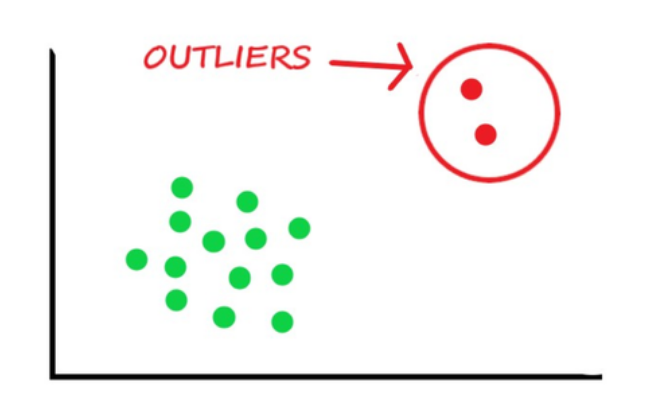

Let's look at the outliers for the item_cnt_day value on a City-Shop-Item basis.

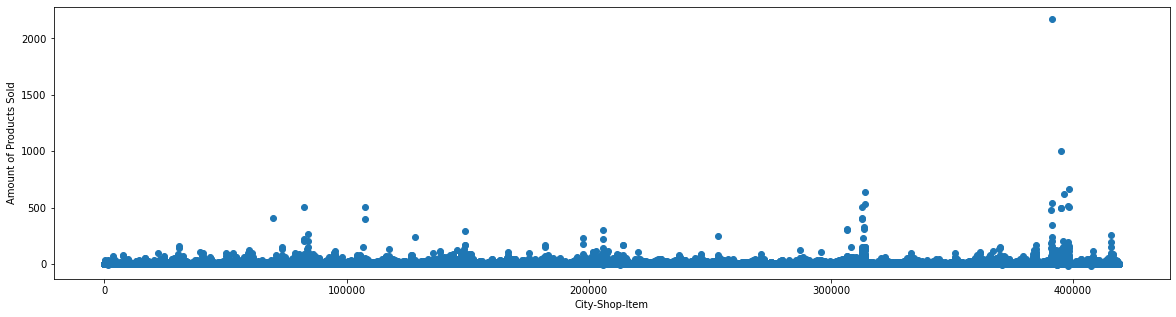

In [48]:
fig, ax = plt.subplots(figsize=(20,5))
ax.scatter(train['city_shop_item_id'], train['item_cnt_day'])
ax.set_xlabel('City-Shop-Item')
ax.set_ylabel('Amount of Products Sold')
plt.show()

After detecting the outliers, we checked it in detail below.

In [49]:
train['item_cnt_day'].sort_values(ascending=False)[:5]

2929294    2169.0
2372696    1000.0
2881762     669.0
2881169     637.0
2578967     624.0
Name: item_cnt_day, dtype: float64

In [50]:
#İade
train['item_cnt_day'].sort_values(ascending=True)[:5]

1033516   -22.0
1813262   -16.0
2053229    -9.0
71748      -6.0
991325     -6.0
Name: item_cnt_day, dtype: float64

In [51]:
train[train['item_cnt_day']==2169]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code,city_shop_item,city_shop_item_id
2929294,2015-10-28,33,12,11373,0.908714,2169.0,Интернет-магазин ЧС,Интернет-магазин,Online store,E-shop online,Доставка до пункта выдачи (Boxberry),9,Доставка товара,28,10,2015,2,Wednesday,Доставка товара,Доставка товара,3,59,7,7-12-11373,391432


In [52]:
items[items['item_id']==11373]

,item_name,item_id,item_category_id,item_category_name
11373,Доставка до пункта выдачи (Boxberry),11373,9,Доставка товара


In [53]:
train[train['item_id']==11373].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code,city_shop_item,city_shop_item_id
35576,2013-01-08,0,12,11373,1000.0,1.0,Интернет-магазин ЧС,Интернет-магазин,Online store,E-shop online,Доставка до пункта выдачи (Boxberry),9,Доставка товара,8,1,2013,1,Tuesday,Доставка товара,Доставка товара,3,59,7,7-12-11373,391432
113679,2013-01-31,0,12,11373,97.8,5.0,Интернет-магазин ЧС,Интернет-магазин,Online store,E-shop online,Доставка до пункта выдачи (Boxberry),9,Доставка товара,31,1,2013,3,Thursday,Доставка товара,Доставка товара,3,59,7,7-12-11373,391432
115940,2013-02-01,1,12,11373,229.0,1.0,Интернет-магазин ЧС,Интернет-магазин,Online store,E-shop online,Доставка до пункта выдачи (Boxberry),9,Доставка товара,1,2,2013,4,Friday,Доставка товара,Доставка товара,3,59,7,7-12-11373,391432
129869,2013-02-04,1,12,11373,130.0,1.0,Интернет-магазин ЧС,Интернет-магазин,Online store,E-shop online,Доставка до пункта выдачи (Boxberry),9,Доставка товара,4,2,2013,0,Monday,Доставка товара,Доставка товара,3,59,7,7-12-11373,391432
271073,2013-03-11,2,12,11373,323.0,2.0,Интернет-магазин ЧС,Интернет-магазин,Online store,E-shop online,Доставка до пункта выдачи (Boxberry),9,Доставка товара,11,3,2013,0,Monday,Доставка товара,Доставка товара,3,59,7,7-12-11373,391432


In [54]:
train[(train['item_id']==11373) & (train['item_cnt_day'] != 2169) & (train['item_cnt_day'] > 0 )].median()

date_block_num           21.00
shop_id                  12.00
item_id               11373.00
item_price              282.25
item_cnt_day              4.00
item_category_id          9.00
day                      16.00
month                     7.00
year                   2014.00
weekday                   2.00
main_category_id          3.00
sub_category_id          59.00
city_code                 7.00
city_shop_item_id    391432.00
dtype: float64

In [55]:
train[(train['item_id']==11373) & (train['item_cnt_day'] != 2169) & (train['item_cnt_day'] > 0 )].mode(numeric_only=True)

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year,weekday,main_category_id,sub_category_id,city_code,city_shop_item_id
0,32,12,11373,130.0,1.0,9,29,9,2014,0,3,59,7,391432


In [56]:
train[(train['item_id']==11373) & (train['item_cnt_day'] != 2169) & (train['item_cnt_day'] > 0 )].mean()

date_block_num           19.920086
shop_id                  12.000000
item_id               11373.000000
item_price              368.340789
item_cnt_day              9.490281
item_category_id          9.000000
day                      15.812095
month                     6.691145
year                   2014.185745
weekday                   1.924406
main_category_id          3.000000
sub_category_id          59.000000
city_code                 7.000000
city_shop_item_id    391432.000000
dtype: float64

In [57]:
train[(train['item_id']==11373) & (train['item_cnt_day'] != 2169) & (train['item_cnt_day'] > 0 )].std()

date_block_num         8.806241
shop_id                0.000000
item_id                0.000000
item_price           296.783418
item_cnt_day          29.891713
item_category_id       0.000000
day                    8.700730
month                  3.232289
year                   0.753097
weekday                1.462633
main_category_id       0.000000
sub_category_id        0.000000
city_code              0.000000
city_shop_item_id      0.000000
dtype: float64

Let's look at the outliers for the item_price value on a City-Shop-Item basis.

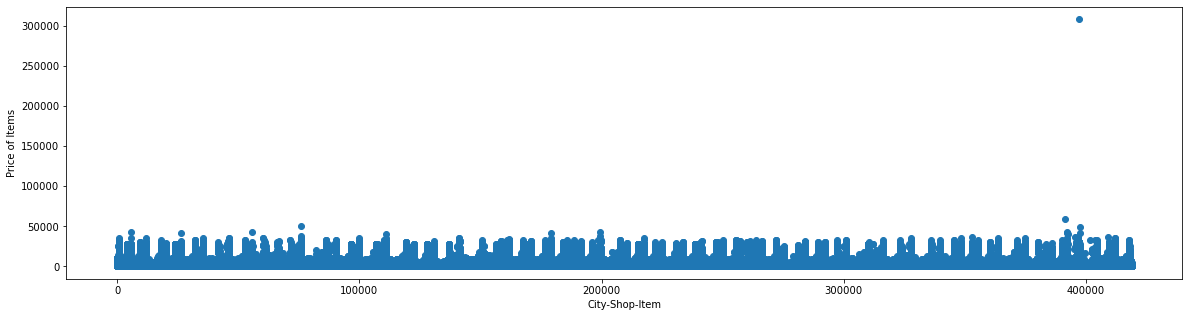

In [58]:
fig, ax = plt.subplots(figsize=(20,5))
ax.scatter(train['city_shop_item_id'], train['item_price'])
ax.set_xlabel('City-Shop-Item')
ax.set_ylabel('Price of Items')
plt.show()

As we can see from the above scatterplot, there is specifically one outlier which has an extreme price relatively.

Then the details of it will be located in below:



In [59]:
train['item_price'].sort_values(ascending=False)[:5]

1163286    307980.0
890692      59200.0
1515489     50999.0
2405118     49782.0
2921040     42990.0
Name: item_price, dtype: float64

In [60]:
train[train['item_price']==307980.0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code,city_shop_item,city_shop_item_id
1163286,2013-12-13,11,12,6066,307980.0,1.0,Интернет-магазин ЧС,Интернет-магазин,Online store,E-shop online,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса,13,12,2013,4,Friday,Программы,Для дома и офиса,15,29,7,7-12-6066,396958


In [61]:
items[items['item_id']==6066]

,item_name,item_id,item_category_id,item_category_name
6066,Radmin 3 - 522 лиц.,6066,75,Программы - Для дома и офиса


In [62]:
train[train['item_id']==6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code,city_shop_item,city_shop_item_id
1163286,2013-12-13,11,12,6066,307980.0,1.0,Интернет-магазин ЧС,Интернет-магазин,Online store,E-shop online,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса,13,12,2013,4,Friday,Программы,Для дома и офиса,15,29,7,7-12-6066,396958


In [63]:
train['item_price'].sort_values()[:5]

482863   -1.0000
566790    0.0700
555310    0.0700
555558    0.0875
731884    0.0900
Name: item_price, dtype: float64

In [64]:
train[train['item_price']==-1.0000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code,city_shop_item,city_shop_item_id
482863,2013-05-15,4,32,2973,-1.0,1.0,"Москва ТЦ ""Серебряный Дом""",Москва,Moscow,"Moscow shopping center ""Silver House""","DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,15,5,2013,2,Wednesday,Игры,PS3,5,10,13,13-32-2973,155131


In [65]:
items[items['item_id']==2973]

,item_name,item_id,item_category_id,item_category_name
2973,"DmC Devil May Cry [PS3, русские субтитры]",2973,19,Игры - PS3


In [66]:
train[train['item_id']==2973].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code,city_shop_item,city_shop_item_id
60274,2013-01-15,0,8,2973,2499.0,1.0,"Воронеж ТРЦ Сити-Парк ""Град""",Воронеж,Voronezh,"Voronezh SEC City-Park ""Grad""","DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,15,1,2013,1,Tuesday,Игры,PS3,5,10,4,4-8-2973,382779
60376,2013-01-15,0,14,2973,2499.0,3.0,"Казань ТЦ ""ПаркХаус"" II",Казань,Kazan,"Kazan shopping center ""Parkhouse"" II","DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,15,1,2013,1,Tuesday,Игры,PS3,5,10,8,8-14-2973,408025
60551,2013-01-15,0,11,2973,1901.0,2.0,Жуковский ул. Чкалова 39м?,Жуковский,Zhukovsky,Zhukovsky st. Chkalova 39m?,"DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,15,1,2013,1,Tuesday,Игры,PS3,5,10,6,6-11-2973,388856
60637,2013-01-15,0,45,2973,2499.0,1.0,"Самара ТЦ ""ПаркХаус""",Самара,Samara,"Самара ТЦ ""ПаркХаус""","DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,15,1,2013,1,Tuesday,Игры,PS3,5,10,20,20-45-2973,237185
60700,2013-01-15,0,29,2973,2499.0,3.0,"Москва ТЦ ""Новый век"" (Новокосино)",Москва,Moscow,"Moscow shopping center ""New Age"" (Novokosino)","DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,15,1,2013,1,Tuesday,Игры,PS3,5,10,13,13-29-2973,126525


In [67]:
train_price_median = train[(train['shop_id']==32) & (train['item_id']==2973) & (train['date_block_num']==4) & (train['item_price'] > 0)].item_price.median()
train_price_median

#check the mode and median after setting the model again

1874.0

In [68]:
train.loc[train['item_price']< 0, 'item_price'] = train_price_median

In [69]:
train[(train['shop_id']==32) & (train['item_id']==2973) & (train['date_block_num']==4)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code,city_shop_item,city_shop_item_id
458396,2013-05-06,4,32,2973,2499.0,1.0,"Москва ТЦ ""Серебряный Дом""",Москва,Moscow,"Moscow shopping center ""Silver House""","DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,6,5,2013,0,Monday,Игры,PS3,5,10,13,13-32-2973,155131
482863,2013-05-15,4,32,2973,1874.0,1.0,"Москва ТЦ ""Серебряный Дом""",Москва,Moscow,"Moscow shopping center ""Silver House""","DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,15,5,2013,2,Wednesday,Игры,PS3,5,10,13,13-32-2973,155131
503614,2013-05-23,4,32,2973,1249.0,1.0,"Москва ТЦ ""Серебряный Дом""",Москва,Moscow,"Moscow shopping center ""Silver House""","DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,23,5,2013,3,Thursday,Игры,PS3,5,10,13,13-32-2973,155131


In [70]:
train = train[(train.item_price<100000) & (train.item_cnt_day<1000)]

In [71]:
train.shape

(2935840, 25)

<a id = '9.0'></a>
## <p style = "font-size : 30px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #006400; border-radius: 5px 5px;"><strong>Checking Train & Test Set </strong></p>


In this part, we checked that if the shops in test-set are also included in the train-set or not.

In [72]:
shop_id_train_unique_list = list(train['shop_id'].unique())
shop_id_test_unique_list = list(test['shop_id'].unique())

if(set(shop_id_test_unique_list).issubset(set(shop_id_train_unique_list))):
    print ('Test list is subset of train list')
else:
    print ('Test list is not subset of train list')

Test list is subset of train list


In [73]:
item_id_train_unique_list = list(train['item_id'].unique())
item_id_test_unique_list = list(test['item_id'].unique())

if(set(item_id_test_unique_list).issubset(set(item_id_train_unique_list))):
    print ('Test list is subset of train list')
else:
    print ('Test list is not subset of train list')

Test list is not subset of train list


Do all shop id present in test data present in train data and viceversa?

Do all item id present in test data present in train data and viceversa?

Do all shop id - item id pairs present in test data present in train data and viceversa?

In [74]:
train_shop_ids = set(train['shop_id'].unique())
test_shop_ids = set(test['shop_id'].unique())

train_item_ids = set(train['item_id'].unique())
test_item_ids = set(test['item_id'].unique())

print(f'There are about {len(train_shop_ids)} unique shop ids in train data and {len(test_shop_ids)} shop ids in test data')
print(f'There are about {len(train_item_ids)} unique item ids in train data and {len(test_item_ids)} item ids in test data')
print('--'*50)

train['pair'] = train[['shop_id','item_id']].apply(lambda x: str(x['shop_id'])+'_'+str(x['item_id']),axis=1)
test['pair'] = test[['shop_id','item_id']].apply(lambda x: str(x['shop_id'])+'_'+str(x['item_id']),axis=1)
train_pair_ids = set(train['pair'].unique())
test_pair_ids = set(test['pair'].unique())

print(f'There are {len(train_shop_ids - test_shop_ids)} shop ids present in train data which are not in test data')
print(f'There are {len(train_item_ids - test_item_ids)} item ids present in train data which are not in test data')
print(f'There are {len(train_pair_ids - test_pair_ids)} shop id item id pairs present in train data which are not in test data')

print('--'*50)

print(f'There are {len(test_item_ids - train_item_ids)} item ids present in test data which are not in train data')
print(f'There are {len(test_shop_ids - train_shop_ids)} shop ids present in test data which are not in train data')
print(f'There are {len(test_pair_ids - train_pair_ids)} shop id item id pairs present in test data which are not in train data')

There are about 57 unique shop ids in train data and 42 shop ids in test data
There are about 21806 unique item ids in train data and 5100 item ids in test data
----------------------------------------------------------------------------------------------------
There are 15 shop ids present in train data which are not in test data
There are 17069 item ids present in train data which are not in test data
There are 307437 shop id item id pairs present in train data which are not in test data
----------------------------------------------------------------------------------------------------
There are 363 item ids present in test data which are not in train data
There are 0 shop ids present in test data which are not in train data
There are 102729 shop id item id pairs present in test data which are not in train data


<a id = '10.0'></a>
# <p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Seasonality</strong></p>

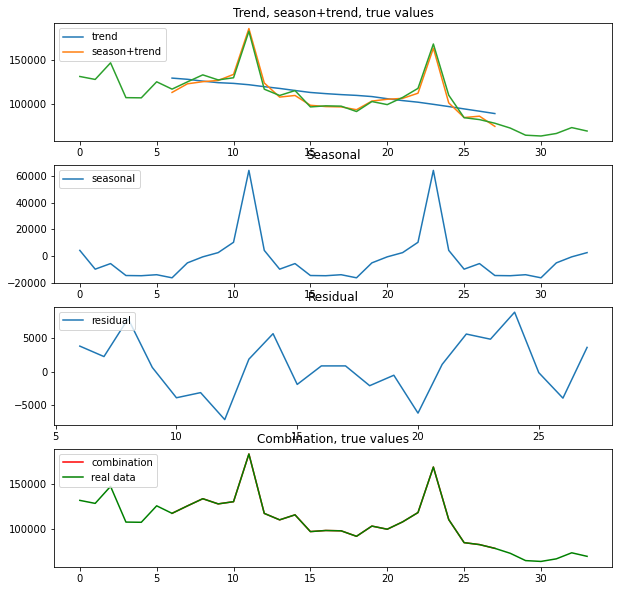

In [75]:
total_sum = train.groupby(['date_block_num']).sum()['item_cnt_day']
tsa = sm.tsa.seasonal_decompose(total_sum.values, freq=12, model='additive')
fig = plt.figure(figsize=(10,10))
axs = fig.subplots(4)
axs[0].title.set_text('Trend, season+trend, true values')
axs[0].plot(tsa.trend, label='trend');
axs[0].plot(tsa.seasonal+tsa.trend, label='season+trend');
axs[0].plot(total_sum.values);
axs[0].legend(loc='upper left');


axs[1].title.set_text('Seasonal')
axs[1].plot(tsa.seasonal, label='seasonal')
axs[1].legend(loc='upper left');



axs[2].title.set_text('Residual')
axs[2].plot(tsa.resid, label='residual')
axs[2].legend(loc='upper left');



axs[3].title.set_text('Combination, true values')
axs[3].plot(tsa.seasonal+tsa.trend+tsa.resid, label='combination', color='r')
axs[3].plot(total_sum.values, label='real data', color='g')
axs[3].legend(loc='upper left');

Aggregating sales to a monthly level and clipping target variable

<a id = '11.0'></a>
# <p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p>

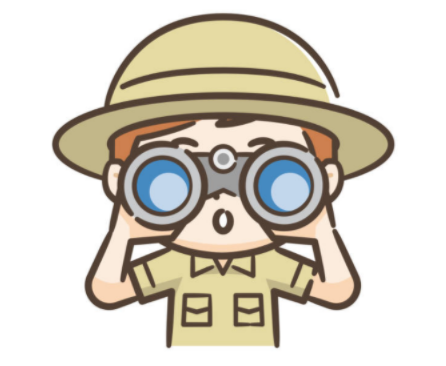

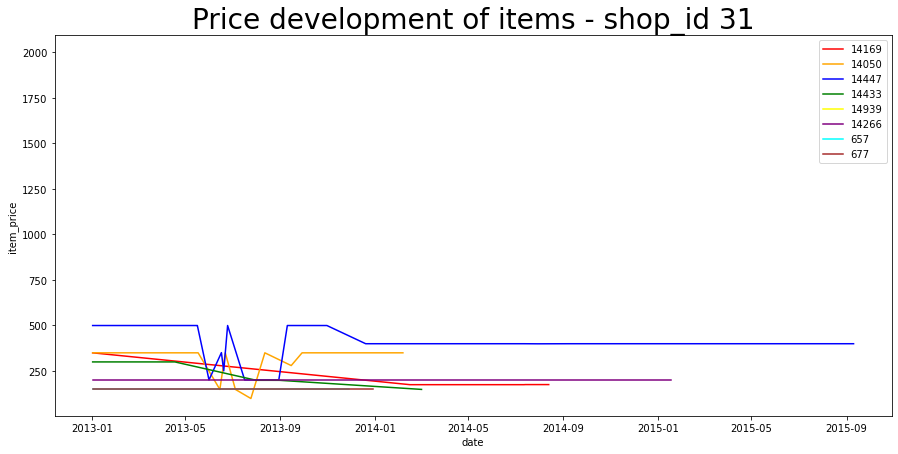

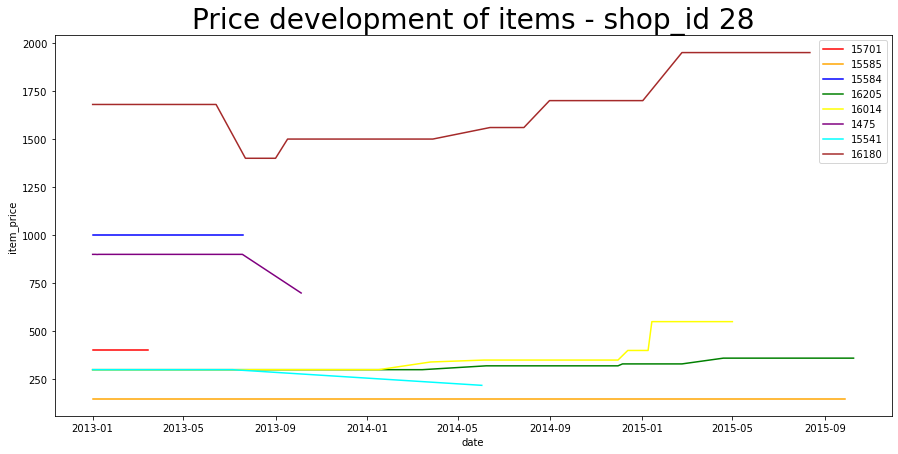

In [77]:
df_tmp = train[train['shop_id'] == 25][['date','item_id','item_price']].reset_index(drop=True)

items = df_tmp['item_id'].unique()[0:8]



fig,axes = plt.subplots(1,1,figsize=(15,7))

colors = ['red','orange','blue','green','yellow','purple','cyan','brown']

for i,item in enumerate(items):

    dprice = df_tmp[df_tmp['item_id'] == item][['item_price','date']]

    

    sns.lineplot(x=dprice['date'],y=dprice['item_price'],ax=axes,color=colors[i],label=item)

    

axes.set_title('Price development of items - shop_id 31',fontsize="28")

axes.legend()

plt.show()

df_tmp = train[train['shop_id'] == 28][['date','item_id','item_price']].reset_index(drop=True)

items = df_tmp['item_id'].unique()[0:8]



fig,axes = plt.subplots(1,1,figsize=(15,7))

colors = ['red','orange','blue','green','yellow','purple','cyan','brown']

for i,item in enumerate(items):

    dprice = df_tmp[df_tmp['item_id'] == item][['item_price','date']]

    

    sns.lineplot(x=dprice['date'],y=dprice['item_price'],ax=axes,color=colors[i],label=item)

    

axes.set_title('Price development of items - shop_id 28',fontsize="28")

axes.legend()

plt.show()

We can see that price of the same item is not same over the time(for some items).
- Some items are also not selling on shops after some time.(might have stopped selling those product)
- It increases and decreases over time.
- During feature engineering it may be useful, if we can flag some items whose price remain constant over time
- Here we can see that item price is dependent on time. This is the beauty of time series.

How does sales over each day looks like?

    Let us see how sales distribution looks for a single day. Before that let us create a new feature which is the turn over for an item.We can consider it as total sales for an item from a particular shop on a particular day.

Which shop id, item id and item category id have maximum sales?

Total number of unique shop ids: 60


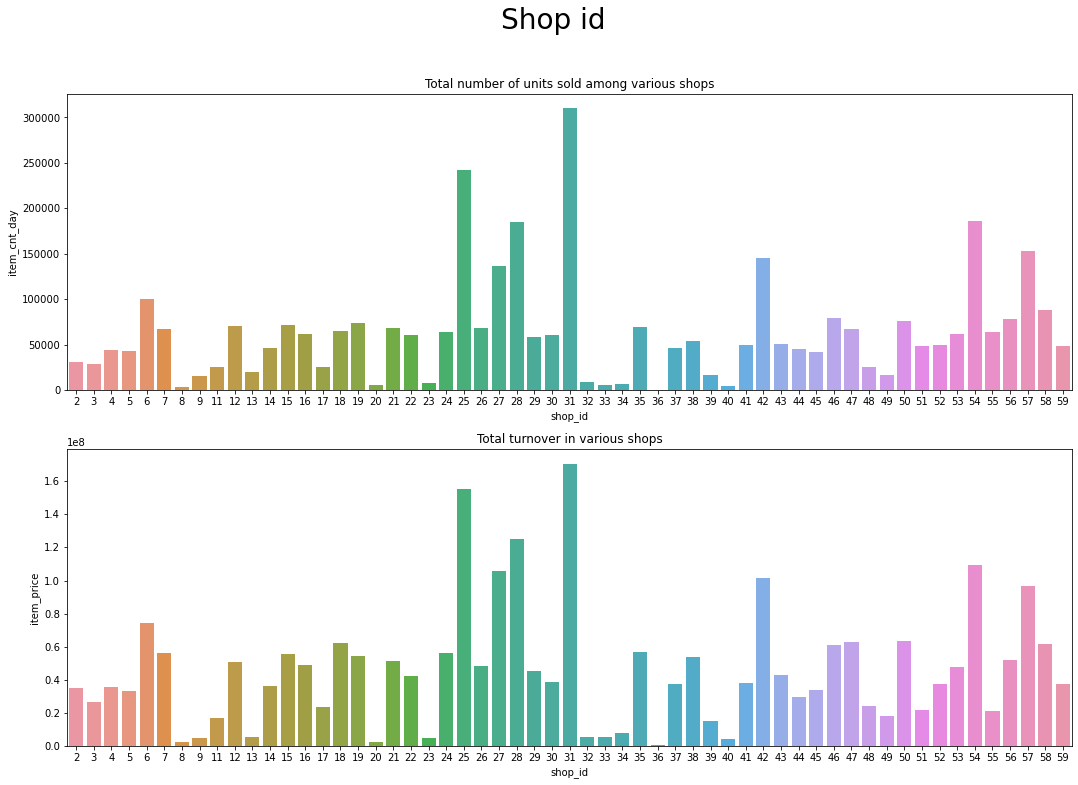

In [78]:
print(f'Total number of unique shop ids: {df["shop_id"].nunique()}')
df_tmp = train[["shop_id","item_price","item_cnt_day"]]
df_tmp= pd.pivot_table(data=df_tmp,index=["shop_id"],aggfunc={"item_cnt_day":np.sum,"item_price":np.sum}).reset_index()

fig, axes = plt.subplots(2,1,figsize=(18,12))
sns.barplot(x=df_tmp["shop_id"],y=df_tmp["item_cnt_day"],ax=axes[0])
axes[0].set_title("Total number of units sold among various shops")
sns.barplot(x=df_tmp["shop_id"],y=df_tmp["item_price"],ax=axes[1])
axes[1].set_title('Total turnover in various shops')
plt.suptitle('Shop id', fontsize="28")
plt.show()

Total number of unique item ids: 21806


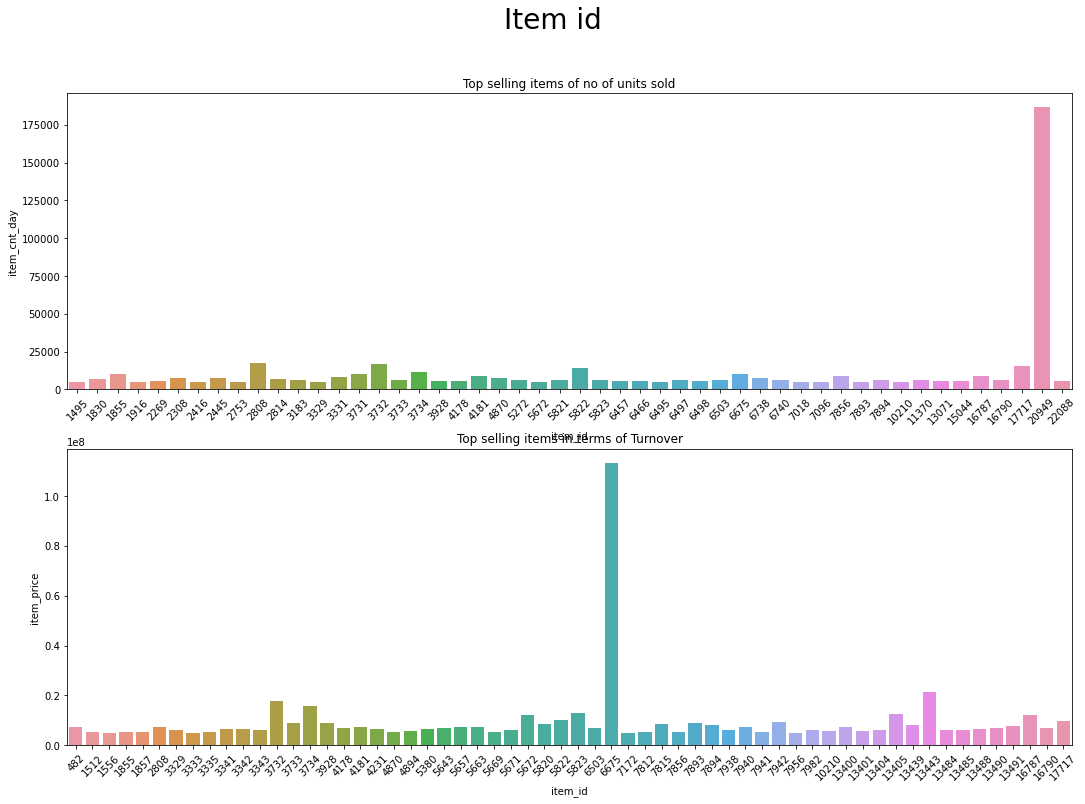

In [79]:
print(f'Total number of unique item ids: {train["item_id"].nunique()}')

df_tmp =train[["item_id","item_price","item_cnt_day"]]
df_tmp= pd.pivot_table(data=df_tmp,index=["item_id"],aggfunc={"item_cnt_day":np.sum,"item_price":np.sum}).reset_index()
df_tmp_sales = df_tmp.sort_values(by=['item_price']).tail(60).reset_index(drop=True)
df_tmp_count = df_tmp.sort_values(by=['item_cnt_day']).tail(50).reset_index(drop=True)

fig, axes = plt.subplots(2,1,figsize=(18,12))
sns.barplot(x=df_tmp_count["item_id"],y=df_tmp_count["item_cnt_day"],ax=axes[0])
axes[0].set_title("Top selling items of no of units sold")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
sns.barplot(x=df_tmp_sales["item_id"],y=df_tmp_sales["item_price"],ax=axes[1])
axes[1].set_title('Top selling items in terms of Turnover')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.suptitle('Item id', fontsize="28")
plt.show()
  # del df_tmp,df_tmp_count,df_tmp_sales

Let's take 20949 and 6675 as an example.

In [80]:
train[train['item_id'] == 20949].sample(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code,city_shop_item,city_shop_item_id,pair
2782180,2015-08-05,31,5,20949,5.0,1.0,"Вологда ТРЦ ""Мармелад""",Вологда,Vologda,"Vologda SEC ""Marmalade""",Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",5,8,2015,2,Wednesday,Подарки,"Сумки, Альбомы, Коврики д/мыши",14,54,3,3-5-20949,351197,5_20949
502292,2013-05-22,4,50,20949,5.0,2.0,"Тюмень ТЦ ""Гудвин""",Тюмень,Tyumen,"Тюмень ТЦ ""Гудвин""",Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",22,5,2013,2,Wednesday,Подарки,"Сумки, Альбомы, Коврики д/мыши",14,54,24,24-50-20949,269876,50_20949
2724511,2015-07-04,30,56,20949,5.0,7.0,"Чехов ТРЦ ""Карнавал""",Чехов,Chekhov,"Чехов ТРЦ ""Карнавал""",Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",4,7,2015,5,Saturday,Подарки,"Сумки, Альбомы, Коврики д/мыши",14,54,28,28-56-20949,320793,56_20949
2849534,2015-09-11,32,25,20949,5.0,21.0,"Москва ТРК ""Атриум""",Москва,Moscow,"Moscow SEC ""Atrium""",Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",11,9,2015,4,Friday,Подарки,"Сумки, Альбомы, Коврики д/мыши",14,54,13,13-25-20949,82239,25_20949
592641,2013-06-18,5,21,20949,5.0,6.0,"Москва МТРЦ ""Афи Молл""",Москва,Moscow,"Moscow MTRC ""Afi Mall""",Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",18,6,2013,1,Tuesday,Подарки,"Сумки, Альбомы, Коврики д/мыши",14,54,13,13-21-20949,50198,21_20949


In [81]:
train[train['item_id'] == 6675].sample(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code,city_shop_item,city_shop_item_id,pair
1535999,2014-03-27,14,17,6675,20990.0,2.0,"Красноярск ТЦ ""Взлетка Плаза""",Красноярск,Krasnoyarsk,"Krasnoyarsk shopping center ""Vzletka Plaza""",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,Игровые консоли - PS4,27,3,2014,3,Thursday,Игровые консоли,PS4,4,11,11,11-17-6675,23868,17_6675
1126814,2013-12-01,11,24,6675,17990.0,1.0,"Москва ТК ""Буденовский"" (пав.К7)",Москва,Moscow,"Moscow TC ""Budenovsky"" (pavilion K7)",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,Игровые консоли - PS4,1,12,2013,6,Sunday,Игровые консоли,PS4,4,11,13,13-24-6675,71918,24_6675
1576811,2014-04-11,15,28,6675,22990.0,1.0,"Москва ТЦ ""МЕГА Теплый Стан"" II",Москва,Moscow,"Moscow shopping center ""MEGA Teply Stan"" II",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,Игровые консоли - PS4,11,4,2014,4,Friday,Игровые консоли,PS4,4,11,13,13-28-6675,119280,28_6675
2392416,2015-01-23,24,53,6675,27490.0,1.0,"Уфа ТЦ ""Семья"" 2",Уфа,Ufa,"Уфа ТЦ ""Семья"" 2",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,Игровые консоли - PS4,23,1,2015,4,Friday,Игровые консоли,PS4,4,11,25,25-53-6675,297109,53_6675
2017244,2014-09-27,20,41,6675,17991.0,2.0,"РостовНаДону ТЦ ""Мега""",РостовНаДону,Rostov on Don,"РостовНаДону ТЦ ""Мега""",Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12,Игровые консоли - PS4,27,9,2014,5,Saturday,Игровые консоли,PS4,4,11,18,18-41-6675,196123,41_6675


Total number of unique item categorical ids: 84


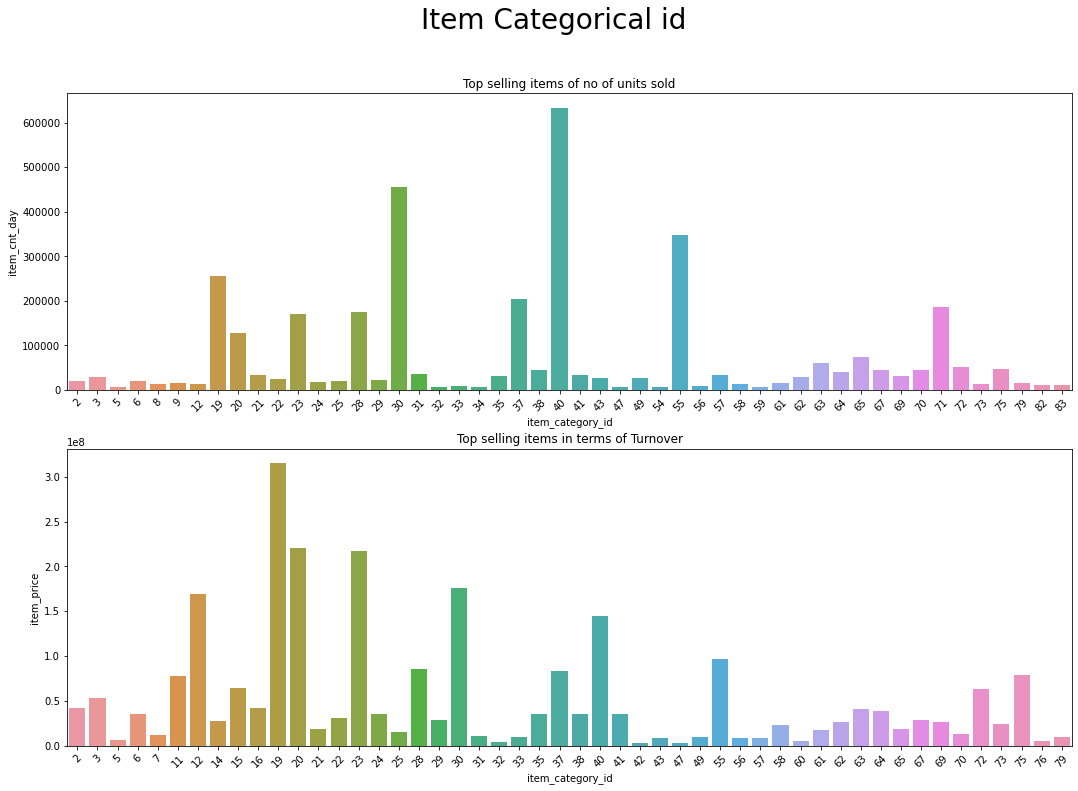

In [82]:
print(f'Total number of unique item categorical ids: {train["item_category_id"].nunique()}')

df_tmp = train[["item_category_id","item_price","item_cnt_day"]]
df_tmp= pd.pivot_table(data=df_tmp,index=["item_category_id"],aggfunc={"item_cnt_day":np.sum,"item_price":np.sum}).reset_index()
df_tmp_sales = df_tmp.sort_values(by=['item_price'],ascending=False).head(50).reset_index(drop=True)
df_tmp_count = df_tmp.sort_values(by=['item_cnt_day'],ascending=False).head(50).reset_index(drop=True)

fig, axes = plt.subplots(2,1,figsize=(18,12))
sns.barplot(x=df_tmp_count["item_category_id"],y=df_tmp_count["item_cnt_day"],ax=axes[0])
axes[0].set_title("Top selling items of no of units sold")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
sns.barplot(x=df_tmp_sales["item_category_id"],y=df_tmp_sales["item_price"],ax=axes[1])
axes[1].set_title('Top selling items in terms of Turnover')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.suptitle('Item Categorical id', fontsize="28")
plt.show()
del df_tmp,df_tmp_count,df_tmp_sales

Which shop id, item id and item category id have maximum sales? :
- In shop id 31, we have maximum units sold and maxiumum sales.
- We have maximum units sold for item 20949. But maximum sales in terms of turnover is for item number 3732.
- Similarly for item categories, we have maximum number of unit sold for item_category_id 40 while maximum sales in terms of turnover for category id 19.

Are there any items which are more than in one category.ie Do an item belongs to single category or not?

In [83]:
tmp = train[['item_id','item_category_id']]
tmp = tmp.groupby(by='item_id').agg(pd.Series.nunique)
tmp[tmp["item_category_id"]!=1]

,item_category_id
item_id,


In [84]:
tmp['item_category_id'].unique()

array([1], dtype=int64)

- We can see that there is only 1 category corresponding to a item_id

What about Monthly Sales?

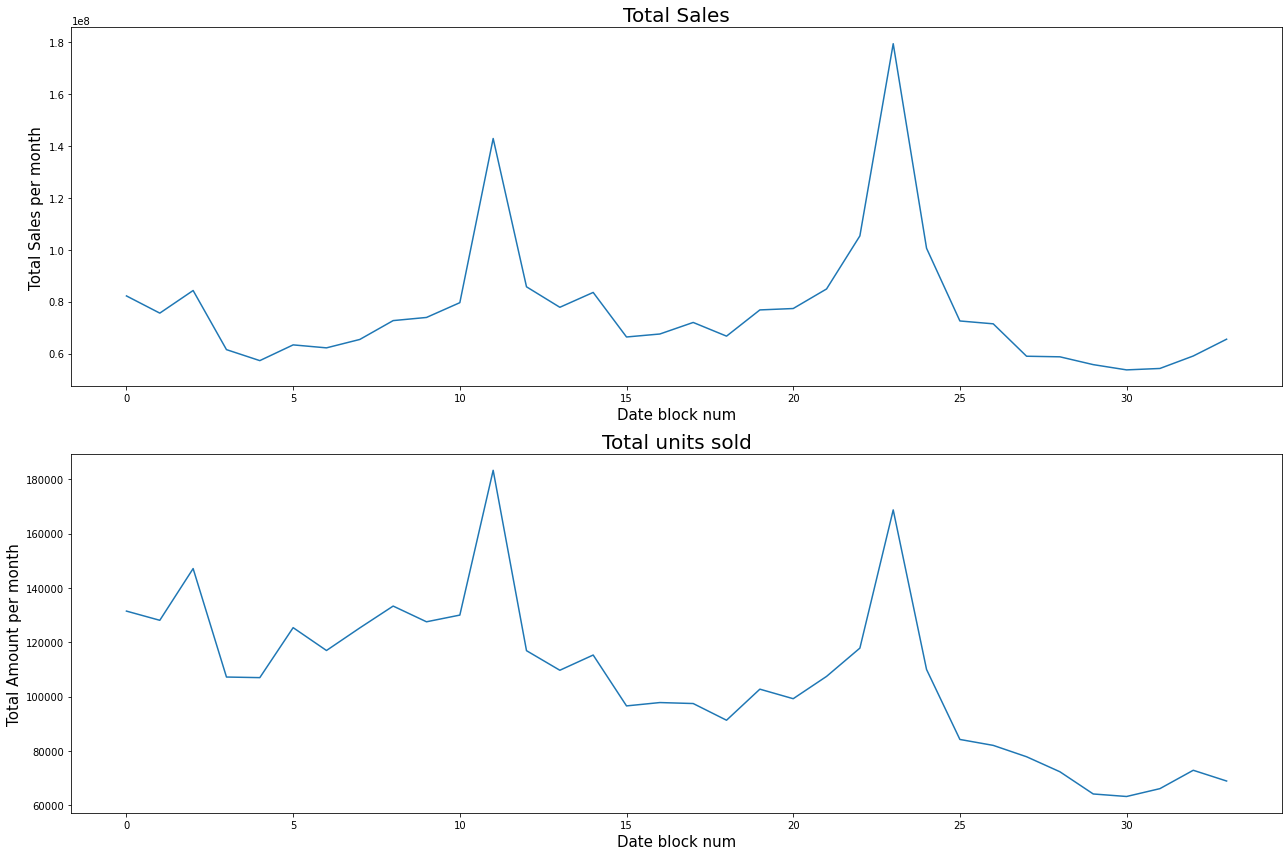

In [85]:
fig,axes = plt.subplots(2,1,figsize=(18,12))
df_tmp = train[['date_block_num','month','item_price']].groupby(by=['date_block_num']).aggregate("sum").reset_index()
sns.lineplot(x=df_tmp['date_block_num'],y=df_tmp['item_price'],ax=axes[0])
axes[0].set_title('Total Sales',fontsize="20")
axes[0].set_xlabel('Date block num',fontsize="15")
axes[0].set_ylabel('Total Sales per month',fontsize="15")


df_tmp = train[['date_block_num','month','item_cnt_day']].groupby(by=['date_block_num']).aggregate("sum").reset_index()
sns.lineplot(x=df_tmp['date_block_num'],y=df_tmp['item_cnt_day'],ax=axes[1])
axes[1].set_title('Total units sold',fontsize="20")
axes[1].set_xlabel('Date block num',fontsize="15")
axes[1].set_ylabel('Total Amount per month',fontsize="15")

plt.tight_layout()
del df_tmp
plt.show()

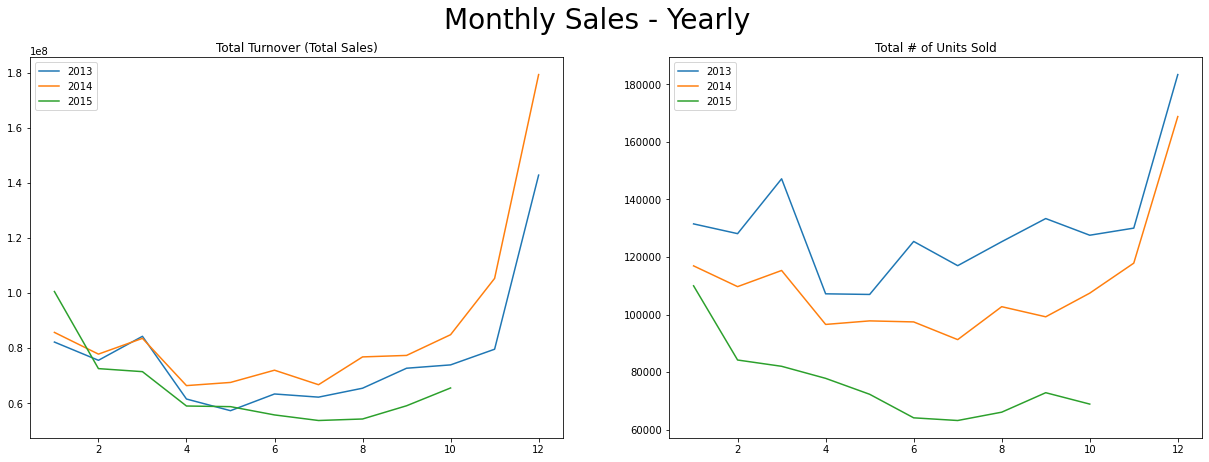

In [86]:
fig,axes = plt.subplots(1,2,figsize=(21,7))
df_tmp = train[['year','month','item_price']].pivot_table(index=['month'],columns=['year'],aggfunc={"item_price":np.sum})
axes[0].plot(df_tmp)
axes[0].set_title('Total Turnover (Total Sales)')
axes[0].legend(labels=[i[1] for i in df_tmp.columns])

df_tmp = train[['year','month','item_cnt_day']].pivot_table(index=['month'],columns=['year'],aggfunc={"item_cnt_day":np.sum})
axes[1].plot(df_tmp)
axes[1].set_title('Total # of Units Sold')
axes[1].legend(labels=[i[1] for i in df_tmp.columns])
plt.suptitle('Monthly Sales - Yearly',fontsize="28")
plt.show()

- We can see that # of products sold and total turnover have almost the same pattern.
- Maximum sales in November and December.
Since we are predicting sales for November 2015, we expect a raise in number of units sold

Do all the shops sold items on all months from 2013 Jan to 2015 Oct?

Do some shops is deactive on mean time and become active again?

In [87]:
df_tmp = df[['date_block_num','shop_id','item_cnt_day']]
dt = pd.pivot_table(index='date_block_num',data=df_tmp,columns='shop_id',aggfunc="sum").reset_index(drop=True)
dt = dt.item_cnt_day
dt.columns.name = None
dt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,5578.0,2947.0,1146.0,767.0,2114.0,NaN,3686.0,2495.0,1463.0,NaN,935.0,NaN,842.0,1178.0,1777.0,2724.0,2978.0,NaN,2856.0,3038.0,NaN,1495.0,1924.0,1948.0,1768.0,8215.0,2331.0,5548.0,7057.0,2820.0,2978.0,10173.0,1238.0,NaN,NaN,2127.0,NaN,2399.0,1704.0,NaN,NaN,1998.0,3991.0,1759.0,1708.0,1634.0,3363.0,2115.0,NaN,NaN,3406.0,2748.0,1812.0,2055.0,9386.0,NaN,3238.0,NaN,NaN,2017.0
1,6127.0,3364.0,488.0,798.0,2025.0,877.0,4007.0,2513.0,1156.0,NaN,1026.0,NaN,1209.0,1036.0,1795.0,2746.0,2614.0,NaN,3341.0,2834.0,NaN,1854.0,2447.0,1941.0,1782.0,7934.0,2597.0,4546.0,5438.0,2834.0,2717.0,11160.0,1494.0,NaN,NaN,2205.0,NaN,2216.0,1670.0,NaN,NaN,1856.0,3965.0,2033.0,1823.0,1530.0,2660.0,1824.0,NaN,NaN,3054.0,2284.0,1737.0,1906.0,8075.0,NaN,2655.0,NaN,NaN,1897.0
2,NaN,NaN,753.0,959.0,2060.0,1355.0,4519.0,2460.0,977.0,NaN,1017.0,NaN,1419.0,1245.0,1893.0,2835.0,3088.0,NaN,3551.0,3020.0,NaN,2233.0,2588.0,2118.0,2014.0,9732.0,3036.0,5454.0,6918.0,3151.0,3026.0,12670.0,1890.0,NaN,NaN,2568.0,NaN,2629.0,2009.0,NaN,NaN,1816.0,4953.0,2504.0,2131.0,1883.0,3103.0,1977.0,NaN,NaN,3610.0,2605.0,2034.0,2365.0,9488.0,NaN,3099.0,6586.0,3773.0,2028.0
3,NaN,NaN,583.0,647.0,285.0,1008.0,3168.0,1540.0,-1.0,NaN,756.0,NaN,1364.0,1018.0,1247.0,2168.0,2118.0,NaN,2421.0,2291.0,NaN,1846.0,2297.0,1698.0,787.0,7867.0,2381.0,3946.0,4910.0,2252.0,2379.0,9621.0,1364.0,NaN,NaN,1845.0,NaN,1946.0,1375.0,NaN,NaN,1387.0,3978.0,1880.0,1628.0,1253.0,2160.0,1540.0,NaN,NaN,2740.0,1945.0,1446.0,1515.0,6726.0,NaN,2153.0,5493.0,2831.0,1388.0
4,NaN,NaN,553.0,710.0,1211.0,1110.0,3022.0,1647.0,NaN,NaN,683.0,NaN,917.0,1104.0,1489.0,1931.0,2261.0,NaN,2944.0,2089.0,NaN,1646.0,1755.0,NaN,1967.0,6860.0,2148.0,3518.0,5703.0,2345.0,2304.0,9423.0,1209.0,NaN,NaN,2048.0,NaN,2019.0,1337.0,NaN,NaN,1597.0,3594.0,1624.0,1379.0,1333.0,2522.0,1724.0,NaN,NaN,2839.0,2243.0,1482.0,1767.0,7006.0,852.0,2140.0,5233.0,2308.0,1374.0
5,NaN,NaN,832.0,784.0,1464.0,1393.0,3847.0,2085.0,NaN,NaN,764.0,NaN,1710.0,1358.0,1863.0,2419.0,3075.0,906.0,3144.0,2638.0,NaN,1912.0,2243.0,NaN,2599.0,8478.0,2661.0,275.0,7056.0,2803.0,2794.0,10072.0,1493.0,NaN,NaN,2280.0,NaN,1829.0,1539.0,NaN,NaN,2185.0,4349.0,2060.0,1666.0,1785.0,2865.0,1654.0,NaN,NaN,3761.0,2200.0,1815.0,2125.0,8101.0,728.0,3105.0,5987.0,2972.0,1707.0
6,NaN,NaN,807.0,721.0,1378.0,1265.0,3360.0,2031.0,NaN,NaN,800.0,NaN,723.0,1094.0,1709.0,2599.0,2898.0,1044.0,2676.0,2459.0,NaN,1860.0,1903.0,NaN,2377.0,7361.0,2163.0,4148.0,6739.0,2205.0,2438.0,9500.0,93.0,NaN,NaN,2041.0,NaN,1293.0,1453.0,NaN,NaN,1997.0,3801.0,1632.0,1487.0,1507.0,2966.0,1329.0,NaN,NaN,3235.0,2273.0,1616.0,1975.0,7225.0,795.0,3294.0,5827.0,3122.0,1747.0
7,NaN,NaN,875.0,890.0,1713.0,1510.0,3702.0,2397.0,NaN,NaN,755.0,NaN,1599.0,944.0,2216.0,2536.0,2457.0,1306.0,1778.0,2675.0,NaN,2061.0,2017.0,NaN,2304.0,7784.0,2452.0,4925.0,7521.0,2073.0,2799.0,9882.0,NaN,NaN,NaN,2391.0,NaN,1472.0,1895.0,NaN,NaN,2149.0,4035.0,1849.0,1610.0,1649.0,3315.0,1610.0,NaN,NaN,3718.0,2142.0,1772.0,2367.0,7792.0,719.0,3311.0,5413.0,2863.0,2048.0
8,NaN,NaN,945.0,1026.0,1536.0,1298.0,4208.0,2599.0,NaN,NaN,1027.0,NaN,2032.0,1153.0,796.0,2790.0,1924.0,1459.0,2774.0,2801.0,NaN,2486.0,2518.0,NaN,3072.0,9251.0,3206.0,4981.0,6753.0,2832.0,3023.0,11204.0,NaN,NaN,NaN,2473.0,NaN,1666.0,1666.0,NaN,NaN,2146.0,5093.0,2768.0,1849.0,1725.0,2963.0,1742.0,NaN,NaN,3655.0,1903.0,2125.0,2440.0,7827.0,812.0,2829.0,5213.0,2735.0,2008.0
9,NaN,NaN,795.0,793.0,1482.0,1267.0,3675.0,2236.0,NaN,6526.0,1013.0,NaN,1890.0,1096.0,1534.0,2612.0,1800.0,1392.0,2145.0,2499.0,NaN,2015.0,2364.0,NaN,2654.0,8356.0,2441.0,4297.0,5609.0,2151.0,2888.0,10754.0,NaN,NaN,NaN,2083.0,NaN,1169.0,1519.0,NaN,NaN,2061.0,4464.0,2279.0,1678.0,1593.0,2794.0,1647.0,NaN,NaN,3525.0,1809.0,1965.0,2245.0,6676.0,916.0,2375.0,5686.0,3022.0,1751.0


- We have a total of 60 shops.But all of them are note active during all the months
- For example in case of shop id 9 , it is active only in 9th 21th and 33th month. Shop id 0 and shop id 1 is only active in first two months. Shop id 52 is active on all the months.(From above pivot table) 
- We can see that some of the shops are not active in certain months and again they become active 
- On feature engineering we can create lag average of sales on shops as a feature.

In [88]:
from math import ceil

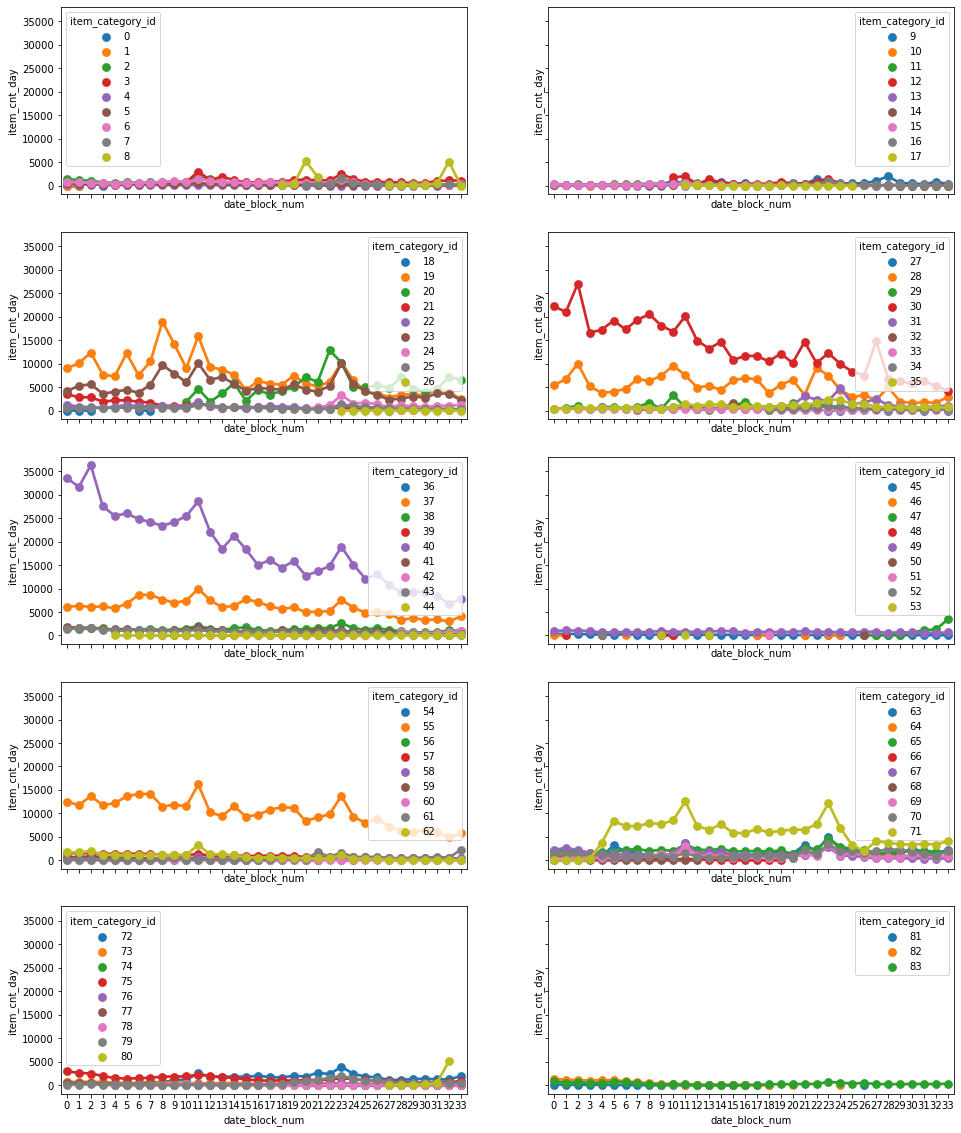

In [89]:
grouped = pd.DataFrame(train.groupby(['item_category_id', 'date_block_num'])['item_cnt_day'].sum().reset_index())
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = ceil(grouped.item_category_id.max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_cnt_day', hue='item_category_id', 
                      data=grouped[np.logical_and(count*id_per_graph <= grouped['item_category_id'], 
                                    grouped['item_category_id'] < (count+1)*id_per_graph)], ax=axes[i][j])
        count += 1

Categorical examination of seasonality

In [90]:
items_seasonality = pd.read_csv("C:/Users/10011598/Desktop/Predict Future Sales/items.csv")
train_seasonality = pd.read_csv("C:/Users/10011598/Desktop/Predict Future Sales/sales_train.csv")

In [91]:
df = [] 
for block_num in train_seasonality['date_block_num'].unique():
    cur_shops = train_seasonality.shop_id.unique()
    cur_items = train_seasonality.item_id.unique()
    df.append(np.array(list(product(*[cur_shops, cur_items, [block_num]]))))

df = pd.DataFrame(np.vstack(df), columns=['shop_id', 'item_id', 'date_block_num'])

In [92]:
train_month = train_seasonality.groupby(['date_block_num','shop_id', 'item_id']).agg({'item_cnt_day': 'sum'}).reset_index()

In [93]:
df = pd.merge(df, train_month, on=['shop_id', 'item_id', 'date_block_num'], how='left').fillna(0)
df = pd.merge(df, items_seasonality, on=['item_id'], how='left').fillna(0)

In [94]:
df.head()

,shop_id,item_id,date_block_num,item_cnt_day,item_name,item_category_id
0,59,22154,0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,59,2552,0,0.0,DEEP PURPLE The House Of Blue Light LP,58
2,59,2554,0,0.0,DEEP PURPLE Who Do You Think We Are LP,58
3,59,2555,0,0.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
4,59,2564,0,0.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59


In [95]:
data = {'item_id': [], 
        'tsa': []}

grouped = pd.DataFrame(df.groupby(['item_category_id', 'date_block_num']).sum()['item_cnt_day']).reset_index()

for i in range(int(grouped.item_category_id.max())):
    try:
        temp = grouped[grouped['item_category_id'] == i]
        tsa = sm.tsa.seasonal_decompose(temp.item_cnt_day.values, freq=12, model='additive')
        tsa = tsa.seasonal
        data['tsa'].append(tsa)
        data['item_id'].append(i)
    except:
        pass
#data['tsa']



In [96]:
seasonal = pd.DataFrame(columns=['date_block_number', 'item_category_id', 'data'])

for i, number in enumerate(data['tsa']):
    for j, num in enumerate(number):
        df_len = len(seasonal)
        seasonal.loc[df_len, 'date_block_number'] = j
        seasonal.loc[df_len, 'item_category_id'] = data['item_id'][i]
        seasonal.loc[df_len, 'data'] = num 
        
        
seasonal

,date_block_number,item_category_id,data
0,0,0,0.0190972
1,1,0,0.0190972
2,2,0,0.0190972
3,3,0,0.0190972
4,4,0,0.0190972
...,...,...,...
2817,29,82,6.99132
2818,30,82,71.533
2819,31,82,7.44965
2820,32,82,-19.2795


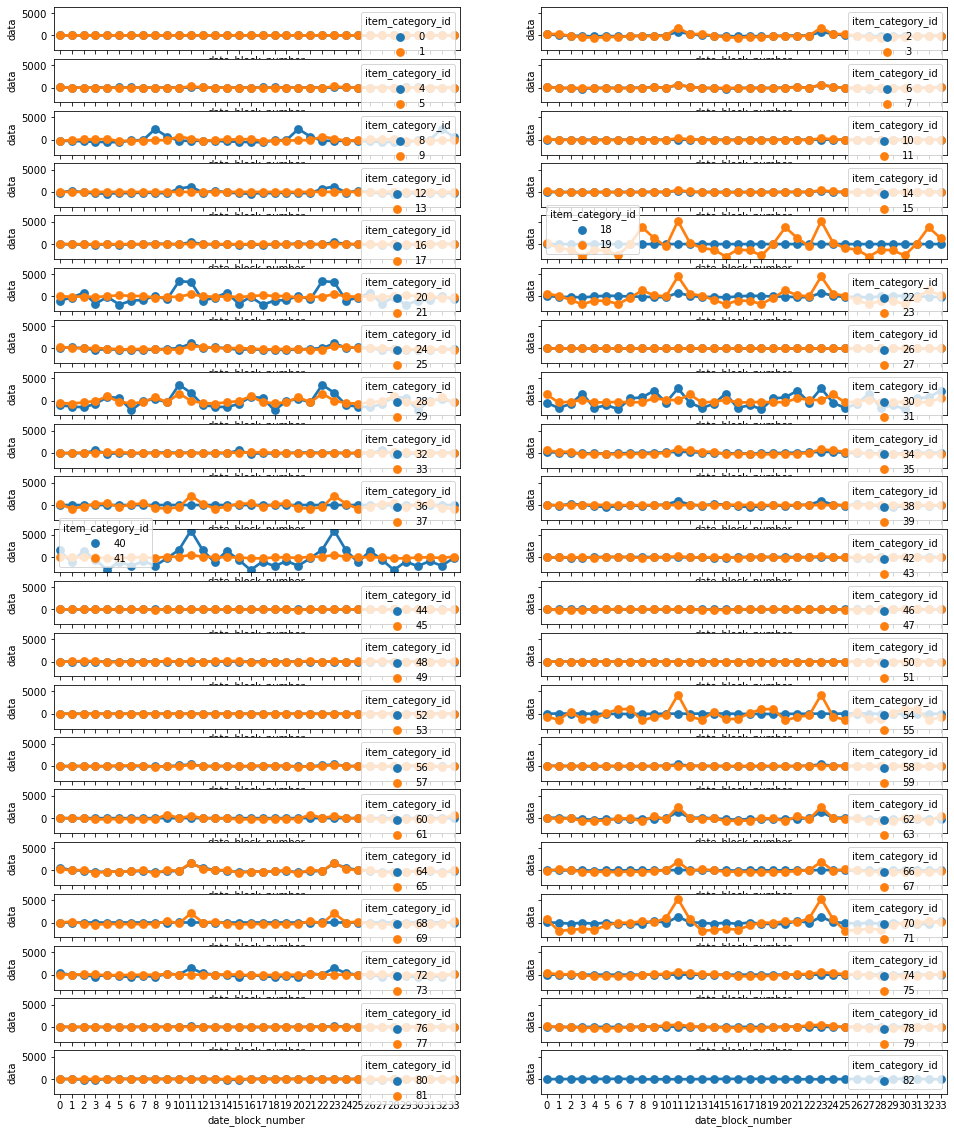

In [97]:
fig, axes = plt.subplots(nrows=21, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 42
id_per_graph = ceil(seasonal.item_category_id.max() / num_graph)
count = 0
for i in range(21):
    for j in range(2):
        sns.pointplot(x='date_block_number', y='data', hue='item_category_id', 
                      data=seasonal[np.logical_and(count*id_per_graph <= seasonal['item_category_id'], 
                                    seasonal['item_category_id'] < (count+1)*id_per_graph)], ax=axes[i][j])
        count += 1


In [98]:
df[df['item_category_id'] ==16]

,shop_id,item_id,date_block_num,item_cnt_day,item_name,item_category_id
16707,59,13525,0,0.0,"Комплект предзаказа Xbox One ""Day One Edition ...",16
16770,59,13527,0,0.0,"Комплект предзаказа Xbox One ""Стандартные изда...",16
16941,59,13528,0,0.0,"Комплект предзаказа Xbox One ""Стандартные изда...",16
16942,59,13526,0,0.0,"Комплект предзаказа Xbox One ""Day One Edition ...",16
17284,59,13404,0,0.0,"Комплект ""Microsoft Xbox One 500GB (Black Box)...",16
...,...,...,...,...,...,...
44485509,36,12124,33,0.0,Игровая консоль. Xbox One 1 TB (5C6-00061),16
44485620,36,12125,33,0.0,Игровая консоль. Xbox One 500 ГБ + Gears of Wa...,16
44485747,36,13530,33,0.0,Комплект предзаказа на консоль Microsoft Xbox ...,16
44485748,36,13531,33,0.0,Комплект предзаказа на консоль Microsoft Xbox ...,16


Categorical examination of seasonality (Graph where non-existing months are blank)

In [99]:
df = [] 
for block_num in train_seasonality['date_block_num'].unique():
    cur_shops = train_seasonality.loc[train_seasonality['date_block_num'] == block_num, 'shop_id'].unique()
    cur_items = train_seasonality.loc[train_seasonality['date_block_num'] == block_num, 'item_id'].unique()
    df.append(np.array(list(product(*[cur_shops, cur_items, [block_num]]))))

df = pd.DataFrame(np.vstack(df), columns=['shop_id', 'item_id', 'date_block_num'])
df = pd.merge(df, train_seasonality, on=['shop_id', 'item_id', 'date_block_num'], how='left').fillna(0)
df = pd.merge(df, items_seasonality, on='item_id', how='left')

In [100]:
data = {'item_id': [], 
        'tsa': []}

grouped = pd.DataFrame(df.groupby(['item_category_id', 'date_block_num']).sum()['item_cnt_day']).reset_index()

for i in range(int(grouped.item_category_id.max())):
    try:
        temp = grouped[grouped['item_category_id'] == i]
        tsa = sm.tsa.seasonal_decompose(temp.item_cnt_day.values, freq=12, model='additive')
        tsa = tsa.seasonal
        data['tsa'].append(tsa)
        data['item_id'].append(i)
    except:
        pass

In [101]:
seasonal = pd.DataFrame(columns=['date_block_number', 'item_category_id', 'data'])

for i, number in enumerate(data['tsa']):
    for j, num in enumerate(number):
        df_len = len(seasonal)
        seasonal.loc[df_len, 'date_block_number'] = j
        seasonal.loc[df_len, 'item_category_id'] = data['item_id'][i]
        seasonal.loc[df_len, 'data'] = num 
        
        
#seasonal

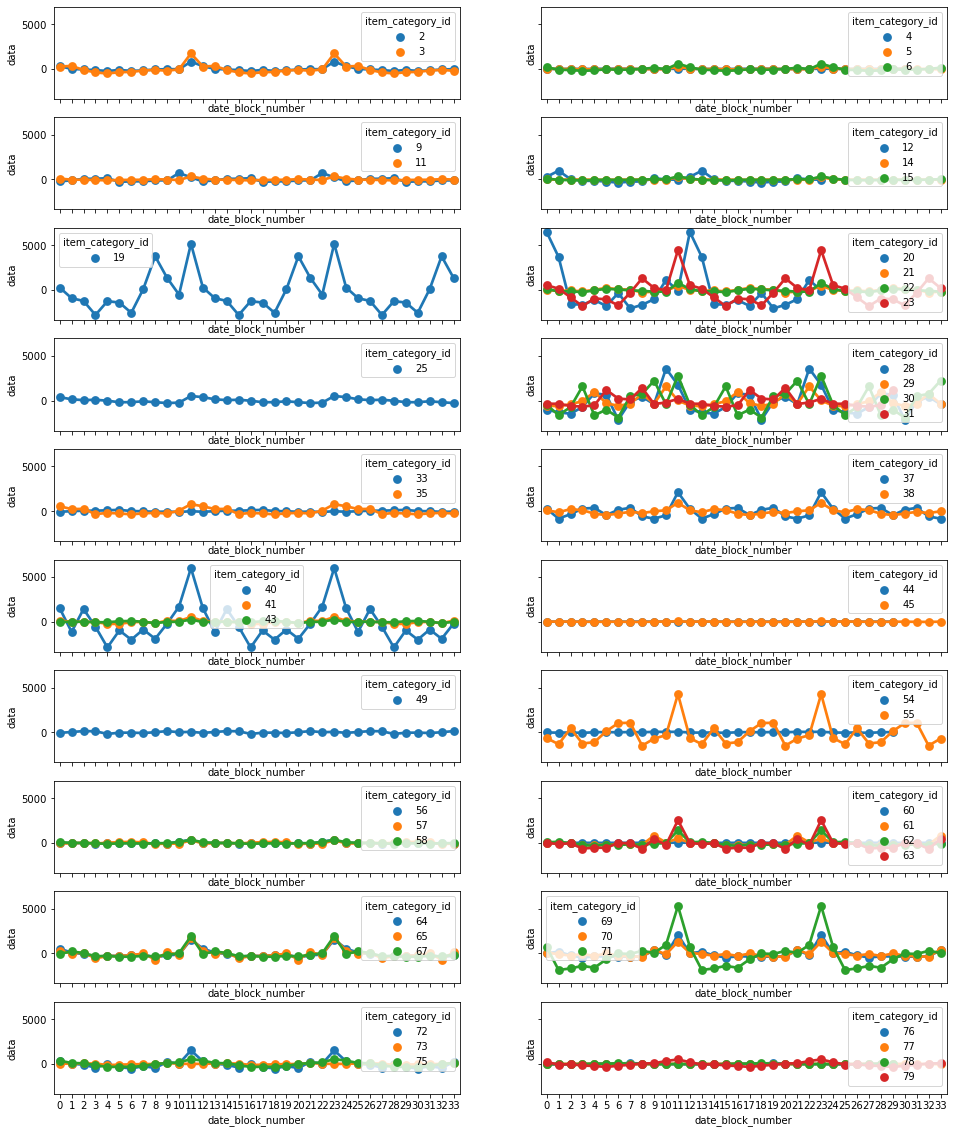

In [102]:
fig, axes = plt.subplots(nrows=10, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 20
id_per_graph = ceil(seasonal.item_category_id.max() / num_graph)
count = 0
for i in range(10):
    for j in range(2):
        sns.pointplot(x='date_block_number', y='data', hue='item_category_id', 
                      data=seasonal[np.logical_and(count*id_per_graph <= seasonal['item_category_id'], 
                                    seasonal['item_category_id'] < (count+1)*id_per_graph)], ax=axes[i][j])
        count += 1

<a id = '12.0'></a>
## <p style = "font-size : 30px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #006400; border-radius: 5px 5px;"><strong>Russian Holidays & Observances</strong></p>



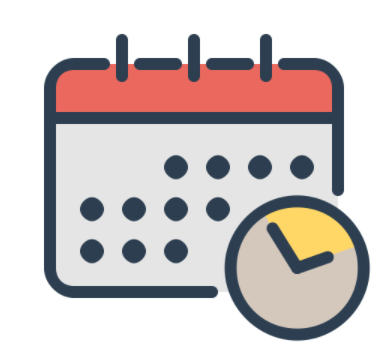

> Russia celebrate Mother’s Day together with International Women’s Day on March 8th.

In [103]:
hol_obs = pd.read_excel("C:/Users/10011598/Desktop/Predict Future Sales/RussiaHolidaysObs_201320142015.xlsx")

In [104]:
hol_obs.head()

,date,day_type
0,2013-01-01,New Year's Day
1,2013-01-02,New Year Holiday
2,2013-01-03,New Year Holiday
3,2013-01-04,New Year Holiday
4,2013-01-07,Orthodox Christmas Day


In [105]:
hol_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      88 non-null     datetime64[ns]
 1   day_type  88 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ KB


In [106]:
train_hol = train.merge(hol_obs, on='date', how='left') #left joining with hol_obs dataset

In [107]:
train_hol.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code,city_shop_item,city_shop_item_id,pair,day_type
0,2013-01-01,0,18,5823,2500.0,1.0,"Красноярск ТЦ ""Июнь""",Красноярск,Krasnoyarsk,"Krasnoyarsk shopping center ""June""",Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,1,1,2013,1,Tuesday,Карты оплаты,PSN,9,12,11,11-18-5823,31860,18_5823,New Year's Day
1,2013-01-01,0,54,17111,149.0,1.0,"Химки ТЦ ""Мега""",Химки,Khimki,"Химки ТЦ ""Мега""",ПЛАНЕТА СОКРОВИЩ м/ф (Регион),40,Кино - DVD,1,1,2013,1,Tuesday,Кино,DVD,11,4,26,26-54-17111,303665,54_17111,New Year's Day
2,2013-01-01,0,15,12168,189.0,2.0,"Калуга ТРЦ ""XXI век""",Калуга,Kaluga,"Kaluga SEC ""XXI century""","Игрушка-мялка ""Сердитые птички"" в ассортименте...",70,Подарки - Сувениры (в навеску),1,1,2013,1,Tuesday,Подарки,Сувениры (в навеску),14,53,9,9-15-12168,411620,15_12168,New Year's Day
3,2013-01-01,0,18,3686,899.0,1.0,"Красноярск ТЦ ""Июнь""",Красноярск,Krasnoyarsk,"Krasnoyarsk shopping center ""June""","God of War 3 (Essentials) [PS3, русская версия]",19,Игры - PS3,1,1,2013,1,Tuesday,Игры,PS3,5,10,11,11-18-3686,30878,18_3686,New Year's Day
4,2013-01-01,0,13,13598,9.0,3.0,"Казань ТЦ ""Бехетле""",Казань,Kazan,"Kazan shopping center ""Bakhetle""","Крафт пакет ""Интересные подарки""-оранжевый",71,"Подарки - Сумки, Альбомы, Коврики д/мыши",1,1,2013,1,Tuesday,Подарки,"Сумки, Альбомы, Коврики д/мыши",14,54,8,8-13-13598,399307,13_13598,New Year's Day


In [108]:
#filling NaN values of Non-holiday or non-observence days as a Normal Day
train_hol.day_type = train_hol.day_type.fillna('Normal Day') 
train_hol.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code,city_shop_item,city_shop_item_id,pair,day_type
0,2013-01-01,0,18,5823,2500.0,1.0,"Красноярск ТЦ ""Июнь""",Красноярск,Krasnoyarsk,"Krasnoyarsk shopping center ""June""",Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,1,1,2013,1,Tuesday,Карты оплаты,PSN,9,12,11,11-18-5823,31860,18_5823,New Year's Day
1,2013-01-01,0,54,17111,149.0,1.0,"Химки ТЦ ""Мега""",Химки,Khimki,"Химки ТЦ ""Мега""",ПЛАНЕТА СОКРОВИЩ м/ф (Регион),40,Кино - DVD,1,1,2013,1,Tuesday,Кино,DVD,11,4,26,26-54-17111,303665,54_17111,New Year's Day
2,2013-01-01,0,15,12168,189.0,2.0,"Калуга ТРЦ ""XXI век""",Калуга,Kaluga,"Kaluga SEC ""XXI century""","Игрушка-мялка ""Сердитые птички"" в ассортименте...",70,Подарки - Сувениры (в навеску),1,1,2013,1,Tuesday,Подарки,Сувениры (в навеску),14,53,9,9-15-12168,411620,15_12168,New Year's Day
3,2013-01-01,0,18,3686,899.0,1.0,"Красноярск ТЦ ""Июнь""",Красноярск,Krasnoyarsk,"Krasnoyarsk shopping center ""June""","God of War 3 (Essentials) [PS3, русская версия]",19,Игры - PS3,1,1,2013,1,Tuesday,Игры,PS3,5,10,11,11-18-3686,30878,18_3686,New Year's Day
4,2013-01-01,0,13,13598,9.0,3.0,"Казань ТЦ ""Бехетле""",Казань,Kazan,"Kazan shopping center ""Bakhetle""","Крафт пакет ""Интересные подарки""-оранжевый",71,"Подарки - Сумки, Альбомы, Коврики д/мыши",1,1,2013,1,Tuesday,Подарки,"Сумки, Альбомы, Коврики д/мыши",14,54,8,8-13-13598,399307,13_13598,New Year's Day


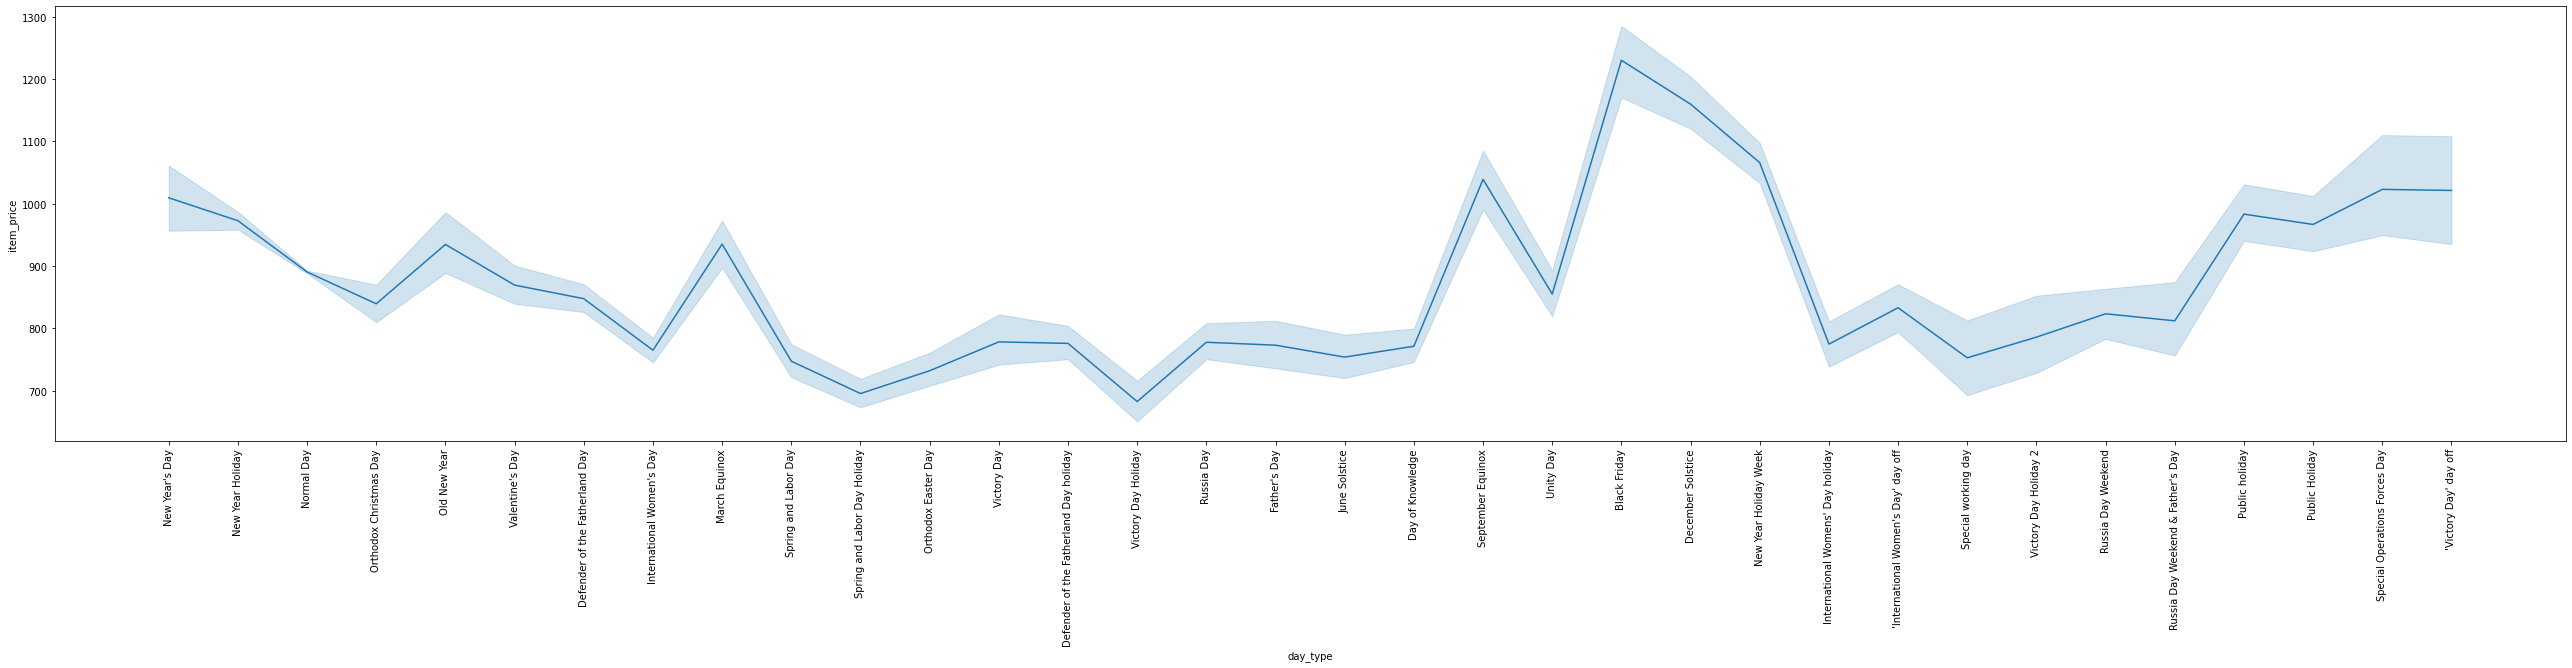

In [109]:
plt.figure(figsize = (45,8))
plt.xticks(rotation=90)
sns.lineplot(x = train_hol.day_type, y = train_hol.item_price, data = train)

Black Friday rocks

In [110]:
print(f'Total number of unique types of days: {train_hol["day_type"].nunique()}')
count_sales_day_type = train_hol[["day_type","item_price","item_cnt_day"]]
count_sales_day_type.head()

Total number of unique types of days: 34


,day_type,item_price,item_cnt_day
0,New Year's Day,2500.0,1.0
1,New Year's Day,149.0,1.0
2,New Year's Day,189.0,2.0
3,New Year's Day,899.0,1.0
4,New Year's Day,9.0,3.0


In [111]:
#dropping Normal Day sales from data bc of the intensity of it according to others 
count_sales_day_type = count_sales_day_type[count_sales_day_type.day_type!= 'Normal Day'] 
count_sales_day_type.head()

,day_type,item_price,item_cnt_day
0,New Year's Day,2500.0,1.0
1,New Year's Day,149.0,1.0
2,New Year's Day,189.0,2.0
3,New Year's Day,899.0,1.0
4,New Year's Day,9.0,3.0


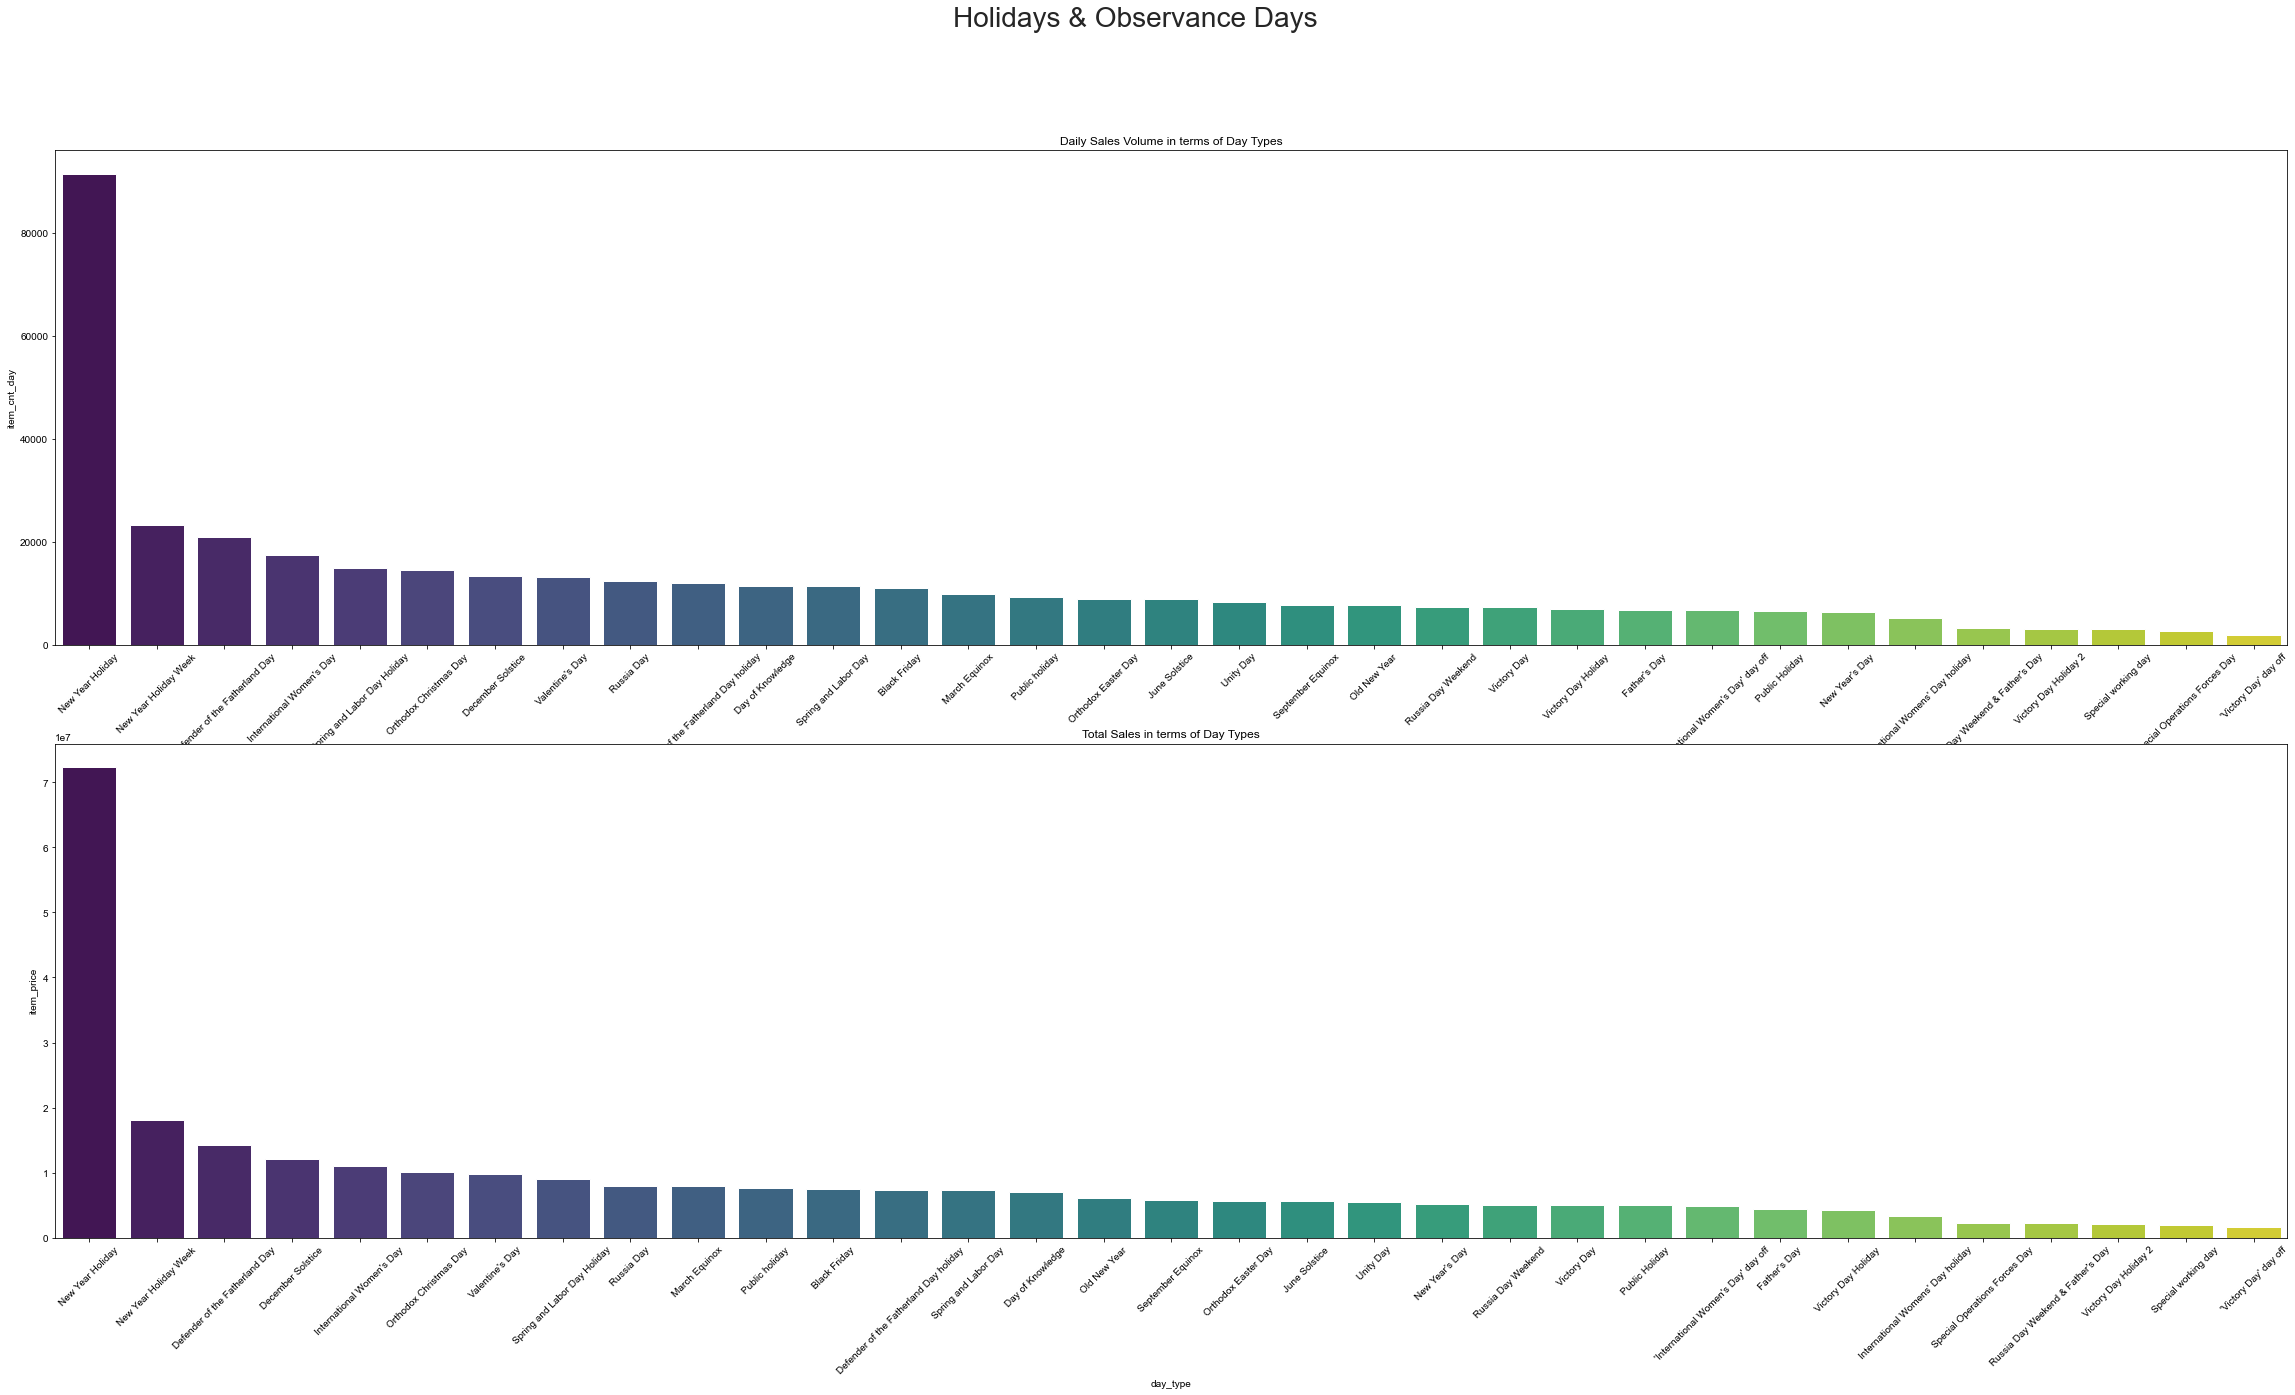

In [112]:
count_sales_day_type = pd.pivot_table(data=count_sales_day_type,index=["day_type"],aggfunc={"item_cnt_day":np.sum,"item_price":np.sum}).reset_index()
sales_day_type = count_sales_day_type.sort_values(by=['item_price'],ascending=False).head(50).reset_index(drop=True)
count_day_type = count_sales_day_type.sort_values(by=['item_cnt_day'],ascending=False).head(50).reset_index(drop=True)

fig, axes = plt.subplots(2,1,figsize=(40,20))
sns.set(style = 'darkgrid')
sns.barplot(x=count_day_type["day_type"],y=count_day_type["item_cnt_day"],ax=axes[0], palette = 'viridis')
axes[0].set_title("Daily Sales Volume in terms of Day Types")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
sns.barplot(x=sales_day_type["day_type"],y=sales_day_type["item_price"],ax=axes[1], palette = 'viridis')
axes[1].set_title('Total Sales in terms of Day Types')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.suptitle('Holidays & Observance Days', fontsize="28")
plt.show()
del count_sales_day_type,sales_day_type,count_day_type

In [113]:
train_hol.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city_ru,city_en,shop_name_en,item_name,item_category_id,item_category_name,day,month,year,weekday,day_name,main_category_name,sub_category_name,main_category_id,sub_category_id,city_code,city_shop_item,city_shop_item_id,pair,day_type
0,2013-01-01,0,18,5823,2500.0,1.0,"Красноярск ТЦ ""Июнь""",Красноярск,Krasnoyarsk,"Krasnoyarsk shopping center ""June""",Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,1,1,2013,1,Tuesday,Карты оплаты,PSN,9,12,11,11-18-5823,31860,18_5823,New Year's Day
1,2013-01-01,0,54,17111,149.0,1.0,"Химки ТЦ ""Мега""",Химки,Khimki,"Химки ТЦ ""Мега""",ПЛАНЕТА СОКРОВИЩ м/ф (Регион),40,Кино - DVD,1,1,2013,1,Tuesday,Кино,DVD,11,4,26,26-54-17111,303665,54_17111,New Year's Day
2,2013-01-01,0,15,12168,189.0,2.0,"Калуга ТРЦ ""XXI век""",Калуга,Kaluga,"Kaluga SEC ""XXI century""","Игрушка-мялка ""Сердитые птички"" в ассортименте...",70,Подарки - Сувениры (в навеску),1,1,2013,1,Tuesday,Подарки,Сувениры (в навеску),14,53,9,9-15-12168,411620,15_12168,New Year's Day
3,2013-01-01,0,18,3686,899.0,1.0,"Красноярск ТЦ ""Июнь""",Красноярск,Krasnoyarsk,"Krasnoyarsk shopping center ""June""","God of War 3 (Essentials) [PS3, русская версия]",19,Игры - PS3,1,1,2013,1,Tuesday,Игры,PS3,5,10,11,11-18-3686,30878,18_3686,New Year's Day
4,2013-01-01,0,13,13598,9.0,3.0,"Казань ТЦ ""Бехетле""",Казань,Kazan,"Kazan shopping center ""Bakhetle""","Крафт пакет ""Интересные подарки""-оранжевый",71,"Подарки - Сумки, Альбомы, Коврики д/мыши",1,1,2013,1,Tuesday,Подарки,"Сумки, Альбомы, Коврики д/мыши",14,54,8,8-13-13598,399307,13_13598,New Year's Day


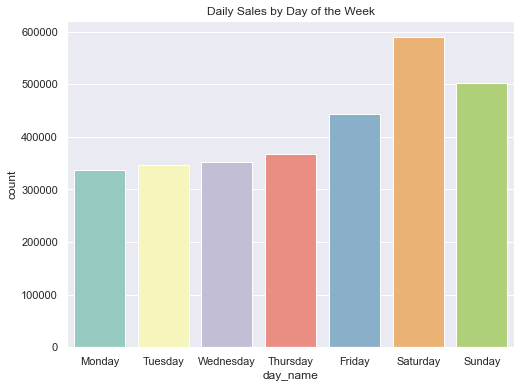

In [114]:
plt.figure(figsize=(8, 6))
sns.set(style = 'darkgrid')
plt.title('Daily Sales by Day of the Week')
sns.countplot(train_hol['day_name'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='Set3')

- Sales is highest on Saturdays probably due to the weekend. Sundays is a close second. 

- Mondays is the lowest in sales, probably because the begining of the working week.